#*Breve resumen del primer flujo de trabajo*
En esta etapa se tuvo lugar al primer acercamiento del dataset de mercado inmoviliario de Properati mediante un Análisis Exploratorio de Datos y la búsqueda de un primer modelo de Machine Learning para determinar el precio de las propiedades en venta (si desea conocer un poco más puede encontrar aquí los detalles [1er_Proyecto_Acamica_Martin_Iglesias](https://github.com/SudestadaARG/AcamicaDS/blob/master/DS_Proyecto_AnalisisdeMercadoInombiliario(EDAyML).ipynb))

*Background*
El dataset consiste en un número de variables que los tasadores de inmuebles toman en cuenta para la realización del precio de la propiedad. Las que se pueden encontrar en este dataset son:

    start_date - Fecha de alta del aviso
    end_date - Fecha de baja del aviso
    created_on - Fecha de alta de la primera versión del aviso
    
    Campos referidos a la ubicación de la propiedad o del desarrollo
        lat - Latitud
        lon - Longitud
        l1 - Nivel administrativo 1: país
        l2 - Nivel administrativo 2: provincia
        l3 - Nivel administrativo 3: ciudad
    
    Campos relativos a la propiedad
        operation_type - Tipo de operación (Venta, Alquiler)
        property_type - Tipo de propiedad(Casa, Departamento, PH)
        rooms - Cantidad de ambientes
        bedrooms - Cantidad de dormitorios
        bathrooms - Cantidad de baños
        surface_total - Superficie total en m²
        surface_covered - Superficie cubierta en m²
        price - Precio publicado en el anuncio
        currency - Moneda del precio publicado
        price_period - Periodo del precio(Diario, Semanal, Mensual)
        title - Título del anuncio
        description - Descripción del anuncio
Estos datos están fechados desde enero 2019 a enero 2020.

En este caso son operaciones tipo Venta y en USD solamente. Tanto la Fecha de alta del aviso y de la primera versión del aviso coinciden. Con esta aclaración uno reduce la cantidad de variables que aporten información al problema.
    

Algunos resultados obtenidos fueron:

En el análisis exploratorio de datos se encontró que las principales variables para la elección del precio presentaban mayores cambios respecto al tipo de propiedad y la localización.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/vYFvW8L/1.png" alt="1" border="0"></a>
<a href="https://ibb.co/7WMSkHQ"><img src="https://i.ibb.co/mqZRNm0/ndice3.png" alt="ndice3" border="0"></a>

A partir de indagar en estos datos se realizaron modelos de Machine Learning para predecir el precio de las propiedades tipo Departamento, PH y Casa en la Ciudad Autónoma de Buenos Aires (Capital Federal). Utilizando la métrica de evaluación RMSE se analizaron los modelos `LinearRegression` (utilizado como Benchmark), `DecisionTreeRegressor` y `KNeighborsRegressor`.

Apartir de analizar la métrica de evaluación para los datos train y test y de buscar los parámetros óptimos para los modelos regresores en la predicción del precio de los tres tipos de propiedades ( Departamento, PH y Casa) se obtuvo que:

    N° de atributos más influyentes: 2 (Superficie cubierta y número de baños)
    Hiperparámetro de DT: Max_depth 15
    Hiperparámetro de KNN: n_neighbor 9 ó 10 (dependiendo la metrica de distancia que se elija, cuyos resultados presentan ganancias marginales pequeñas)

<a href="https://imgbb.com/"><img src="https://i.ibb.co/pvRdBYH/ndice6.png" alt="ndice6" border="0"></a>
<a href="https://imgbb.com/"><img src="https://i.ibb.co/mqFLG0P/ndice5.png" alt="ndice5" border="0"></a>


Finalmente se decidió que el mejor modelo para determinar el valor de los tres tipos de propiedades es el KNN Regresor con 9 vecinos y distancia Euclidiana.
Esta desición es así, a pesar que las metricas "empeoraron" levemente su desempeño al realizar la optimización. Sin embargo, el árbol de decisión optimizado genera una disminución del error sustancial y los datos de entrentrenamiento tenderían a sobreajustarse a pesar de que el error de los datos de testeo disminuyen también.
Es decir, que haciendo un balance no se eligió el DTregresor optimizado porque consideré que no tendría tanta capacidad de generalización por un posible problema de sobreajuste.

Al ser evaluado el proyecto 1 se puntualizó en que en las curvas de validación, el valor óptimo elegido de "profundidad del árbol" es 15, sin embargo, hay mucha diferencia entre train/testing (overfitting): tal vez convendría elegir una profundidad del árbol menor (entre 5 y 8) para no tener esa gran diferencia, y si bien se tendrá un mayor RMSE, no habrá mucha sorpresa entre la predicción generada y el valor real.

Con el feedback obtenido es que se propone mejorar lo previamente analizado utilizando las nuevas herramientas del segundo Sprint. 
A partir de ahora comienza el Proyecto 2.

-Martin Iglesias-






#*Proyecto 2: Optimización del Análisis de mercado inmobiliario*
El objetivo  de este sprint es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. 
`Consta de tres secciones:`

#PARTE A. Transformación de Datos

* Se realizarán las transformaciones de datos apropiadas para el dataset, viendo cómo afecta al desempeño de los modelos y se compara con lo obtenido en el Proyecto 1

Se eligirán de las siguientes tareas las transformaciones, justificando su utilización, que se le harán al dataset:

    1.Detección y eliminación de Outliers
    2.Encoding
    3.Imputación de valores faltantes
    4.Escalado de datos
    5.Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Al final se entrenará el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evaluando su desempeño a partir del dataset obtenido luego de transformar los datos se determinará si hubo una mejora en su desempeño respecto al del proyecto 01, justificando el motivo del resultado.


**Checklist**
-Se debe implementar al menos tres de las transformaciones de datos propuestas. 

###**Importante**

**A.** Justificar por qué creés que las transformaciones elegidas aplican en este dataset. Ten en cuenta que, en el manejo de valores atípicos o en la imputación de valores faltantes, los valores obtenidos deben tener sentido. Por ejemplo, valores mayores que cero para superficies, número de baños, etc.


In [1]:
#Se importan las librerías y funciones a usar.

#Librerías para realizar operaciones con los datos (numpy) y DataFrames(pandas)
import numpy as np
import pandas as pd
#Librerías de visualización de datos (matplotlib y Seaborn).
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Librería de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
#modelos de aprendizaje supervisado del tipo regresion
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

import xgboost #en caso de no tenerlo instalado !pip install xgboost
from xgboost import XGBRFRegressor

#preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures

#métricas
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score


#Extras
import warnings
warnings.filterwarnings('ignore')


#Funciones auxiliares que servirán dentro del código
def TestKol(data,atributo):
    """
    Realiza el test de Kolomogorov
    Es una prueba no paramétrica que determina la bondad de ajuste de dos distribuciones de probabilidad entre sí.
    Más información en: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html
    """
    stats.probplot(data[atributo], dist="norm", sparams=(2.5,),plot=plt)
    plt.title(atributo +' \nProbability plot')
    print(atributo,': ',stats.kstest(data[atributo], 'norm')) 



def eliminarOutliersIQR(X,Atributo):
    """
    Se considera que los valores Outliers se obtienen a partir de los valores:
    Por encima de Q3 + 1.5 * IQR y por debajo de Q1 - 1.5 * IQR, que toman un 2.7σ respecto de la media.
    Ante eso se buscan los valores que son outliers inferior y superior de mi dataset en algun atributo en particular.
    1ro se calculan los percentiles 25 y 75 para conocer el IQR (q25,q75 == Q1 y Q3)
    2do se calculan los valores para delimitar los extremos.
     
    Se genera la máscara que delimita los datos de mi distribución, y me filtra los datos removiendo los outliers.
    Devuelve la cantidad de outliers, la mascara utilizada y el valor filtrado.
    """
    #Calculo los limites para cada tipo de propiedad principal para contar y filtrar los outliers
    Q1, Q3  =np.nanpercentile(X[Atributo], [25,75])  #se usa esta función ya que pandas quantile cuando encuentra un Nan lo elimina considerarlo False.
    IQR=Q3-Q1
    L_inf= Q1-1.5*IQR
    L_sup= Q3+1.5*IQR  
    if (L_inf <=0):
      L_inf=0 #esto lo ralizo ya que las variables con las que trabajo son positivas mayores a cero, sino no es coherente
    outliers = np.logical_or(X[Atributo] < L_inf, X[Atributo] > L_sup) #True es un valor outlier, false no. OJO Los Nan los considera false ya que no son medibles
    #puedo ver la cantidad de outliers totales
    cant_out=outliers.sum()
    #filtro mis datos de outliers 
    datos_sin_outliers = X[~outliers] #un equivalente es np.logical_and(X[Atributo]>=L_inf,X[Atributo]<=L_sup)
    #otra forma X[~((X < L_inf) |(X > L_sup)).any(axis=1)]
    
    #mis datos outliers
    outliers = X[outliers]

    return float(L_inf), float(L_sup), datos_sin_outliers,outliers, outliers,cant_out




def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
#genero el heatmap en una función con una estructura más moldeable.
def Correlation_fig(X):
    """
    Genera un heatmap con una estructura especifica para mi set de datos.
    """
    sns.set(style="whitegrid")
    corr = X.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    fig=plt.figure(figsize=(8,8))
    sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,vmin=0, cbar=True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12})
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    fig.patch.set_facecolor('xkcd:white')
    plt.title('Correlación de Atributos')
    plt.show()

def RMSE(preds,y):
    """
    Función que realiza el error cuadratico medio de mi valor predicho vs el error verdad. redondeado a 4 decimales
    """
    RMSE=round(np.sqrt(mean_squared_error(preds,y)),4)
    return RMSE


def evaluar_model(model,x,y, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #RMSE en TRAIN y TEST 
    #la aclaración de la escala RMSE(1e6) es porque mi variable a predecir la escalo en 1e6 para interpretar mejor los resultados respecto al millon de USD en precio.
    print('Error (RMSE(1e6)) en datos de train:',round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
    print('Error (RMSE(1e6)) en datos de test:',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
    #R2 en TRAIN y TEST
    print('Error (R2) en datos de train:',round(r2_score(y_train, y_train_pred),5)) 
    print('Error (R2) en datos de test:',round(r2_score(y_test, y_test_pred),5))


    ### GRAFICAMOS la de dispersión de y_test vs y_predic_test y el histograma de distribución de errores(generados por el modelo a partir de los datos dev)
    #Si el modelo de regresión es bueno, cerca de que curva deberían estar los puntos. indicando un buen ajuste.
    fig=plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    plt.hist(y_train - y_train_pred, bins = 100, label = 'train', color = 'blue', edgecolor = 'grey')
    plt.hist(y_test - y_test_pred, bins = 100, label = 'test', color = 'red', edgecolor = 'grey')
    plt.xlabel('errores')
    plt.xlim(-0.5,0.5)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.legend() 
    fig.patch.set_facecolor('xkcd:white')

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    fig.patch.set_facecolor('xkcd:white')

    plt.tight_layout()
    plt.show()


In [ ]:
########## Lectura de datos ##########

#En caso de trabajar directamente desde un notebook en la computadora, indicaría:
#Path='ruta_del_archivo/archivo.formato'
#Archivo=pd.read_csv(Path) #si hace falta algún delimitador específicdo se añade.

#Desde google collab monto google drive usando:
from google.colab import drive
drive.mount('/content/drive') #monto el drive en collab y leo el file "DS_Proyecto_01_Datos_Properati.csv" insertando la url con extension csv

#Como este collab se cerrará y volverá a abrir, este procedimiento tiene que volver a hacerse para inicializar los datos.
Archivo=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ProyBloque1/ProyectoB2/DS_Proyecto_01_Datos_Properati.csv', sep=',',engine='python')

#Transformo el CSV en un DataFrame de pandas
Datos_prop=pd.DataFrame(data=Archivo)

In [ ]:
#Cosas a tener en cuenta (previamente observado en el 1er proyecto)
print('La cantidad de elementos de mi DataFrame inicial es: ' + str(Datos_prop.size)) #(fila x columna)  
print('Las dimensiones de mi DataFrame inicial es: ' + str(Datos_prop.shape)) #(fila,columna)
print('======o======')

#Una particularidad del Dataset es que la columna start_date y created_on son iguales.
#Se puede chequear y en ese sentido se descartará la columna created_on por considerar que no aporta información.
#print((Datos_prop.start_date==Datos_prop.created_on).all())
Datos_prop.drop(['created_on'], axis=1, inplace=True)

#Además todos los precios estén en dólares, las propiedades son todas en Argentina y las operaciones son tipo ventas.
#Considero que no aportan valor agregado al problema y por tanto se descartan.
#print((Datos_prop.currency=='USD').all())
#print((Datos_prop.operation_type=='Venta').all())
#print((Datos_prop.l1!='Argentina').sum())
Datos_prop.drop(['operation_type','currency','l1'], axis=1, inplace=True)

print('Las dimensiones de mi nuevo DataFrame es: ' + str(Datos_prop.shape)) #(fila,columna)
print('======o======')


#Observación importante: 
#En el anterior proyecto se encontró datos duplicados en el dataset entre las categorias description y title.
#Esto es importante porque la descripición puede estar hablando de una misma locación pero distintos lotes o dptos dentro de ella.
#Mientras que el titulo "vende" una oferta igual. Por ello hay que considerar estas dos variables juntas.
#Esto es importante tener en cuenta ya que puede afectar a las predicciones del modelo sesgando la muestra hacia elementos más abundantes.

print('El dataset original cuenta un total de datos duplicados en (fila,columna) de: ',Datos_prop[Datos_prop.duplicated()].shape)
#df.duplicated(subset=[]) busca en las columnas de interés y con keep=last los duplicados son verdadero
#Del total de 146660 filas,  se encontró que 37516 son duplicados por descripción y título.

#En ese caso procedo a descartar los elementos duplicados del dataframe, utilizando los mismos argumentos anteriores y reemplazo la variable principal.
Datos_prop=Datos_prop.drop_duplicates()
print('El dataset al descartar los datos duplicados queda con (fila,columna): ',Datos_prop.shape, ' sobre el total de: (146660,16)')
#observacion: si activo nuevamente la celda me va a indicar que no hay datos duplicados en el primer print.

print('======o======')


#Con esto la cantidad de filas únicas que tengo en mi dataset. Esto es distinto a que sepa cuántos duplicados hay.
#como en el ejemplo anterior puede existir un Departamento o lote donde se vendan más de una propiedad en la misma locación, allí no hay datos duplicados y tampoco es única la instancia porque repite almenos un atributo. 
print('La cantidad de elementos (filas=propiedades) únicos en el DataFrame es:',Datos_prop.description.nunique())
print('======o======')

#Finalmente los datos con los que voy a trabajar presentan tamaño y dimensión:
print('La cantidad de elementos de mi DataFrame a trabajar es: ' + str(Datos_prop.size)) #muestra la cantidad de elementos del Dataframe (fila x columna)
print('Las dimensiones de mi DataFrame a trabajar es: ' + str(Datos_prop.shape)) #muestra la dimension (filas,columnas) del Dataframe
print()
#Las columnas con las que voy a trabajar son
print(Datos_prop.columns)

La cantidad de elementos de mi DataFrame inicial es: 2786540
Las dimensiones de mi DataFrame inicial es: (146660, 19)
======o======
Las dimensiones de mi nuevo DataFrame es: (146660, 15)
======o======
El dataset original cuenta un total de datos duplicados en (fila,columna) de:  (2358, 15)
El dataset al descartar los datos duplicados queda con (fila,columna):  (144302, 15)  sobre el total de: (146660,16)
======o======
La cantidad de elementos (filas=propiedades) únicos en el DataFrame es: 106668
======o======
La cantidad de elementos de mi DataFrame a trabajar es: 2164530
Las dimensiones de mi DataFrame a trabajar es: (144302, 15)

Index(['start_date', 'end_date', 'lat', 'lon', 'l2', 'l3', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'price', 'title',
       'description', 'property_type'],
      dtype='object')


In [ ]:
#Realizo un filtrado del dataset inicial para partir de las mismas condiciones que se le dio a los modelos del Proyecto 1.
#1. Selecciono aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
Data_filtrado=Datos_prop.copy()
Data_filtrado=Data_filtrado[(Data_filtrado['property_type'].isin(['Departamento', 'Casa','PH'])) & (Data_filtrado['l2'].isin(['Capital Federal']))]
#Para chequear que otros elementos no estén en mi subset. 
#print((Data_filtrado.property_type=='Oficina').sum()==0)
#print((Data_filtrado.l2 != 'Capital Federal').sum()==0)


#2.Realizo un analisis de coherencia sobre surface_covered y surface_total
#Se observó que los errores en las instancias de ambos atributos tenía pocas variaciones, lo que lleva a pensar que el error que se cometió al pasar la base de datos.
#Por esto se procede a invertir de lugar los elementos.
superficies_incorrectas = Data_filtrado.loc[Data_filtrado.surface_total < Data_filtrado.surface_covered]
print(len(superficies_incorrectas))
Data_filtrado.loc[superficies_incorrectas.index,'surface_total'] = superficies_incorrectas.surface_covered
Data_filtrado.loc[superficies_incorrectas.index,'surface_covered'] = superficies_incorrectas.surface_total
### Para verificar que las invirtio bien
superficies_incorrectas = Data_filtrado.loc[Data_filtrado.surface_total < Data_filtrado.surface_covered]
print(len(superficies_incorrectas))
Data_filtrado.reset_index(drop=True,inplace=True)


#3. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
Data_filtrado=Data_filtrado[(Data_filtrado['surface_total']<=1000) & (Data_filtrado['surface_total']>=15)]
#Para chequear que otros elementos no estén en mi subset. 
#print((Data_filtrado.surface_total>1000).sum()==0)
#print((Data_filtrado.surface_total<15).sum()==0)

#4. Selecciona aquellas propiedades cuyo precio es menor 4000000 dólares.
Data_filtrado=Data_filtrado[(Data_filtrado['price'] <= 4000000)]
#print((Data_filtrado.price>4000000).sum()==0)


#5.Se observan los datos con los que voy a trabajar
print(Data_filtrado.columns)

print('Las dimensiones de mi DataFrame a trabajar es: ' + str(Data_filtrado.shape))


760
0
Index(['start_date', 'end_date', 'lat', 'lon', 'l2', 'l3', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'price', 'title',
       'description', 'property_type'],
      dtype='object')
Las dimensiones de mi DataFrame a trabajar es: (80942, 15)


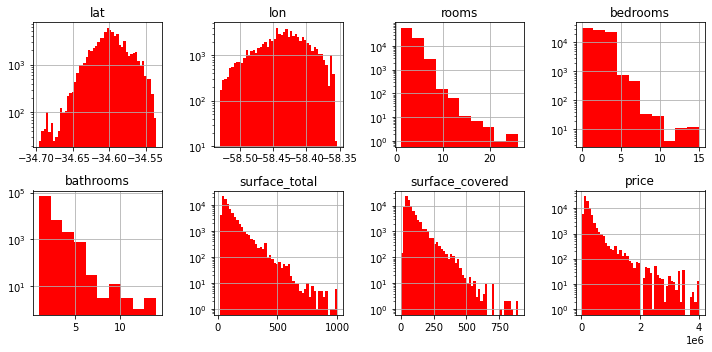

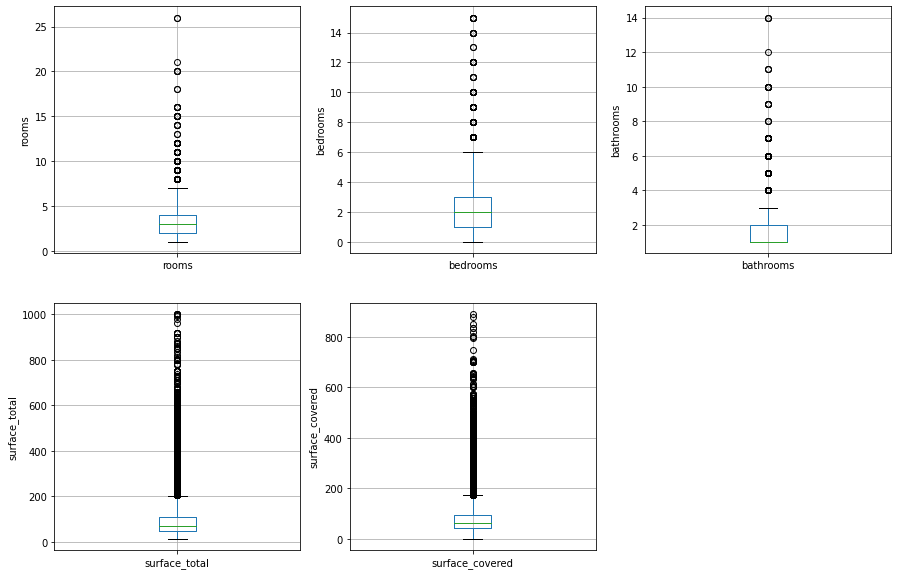

In [ ]:
#Previo al preprocesamiento indago sobre la Distribucion de los datos de variables continuas.
#Se observan las columnas con valores numéricos 'lat', 'lon' 'rooms','bedrooms', 'bathrooms', 'surface_total', 'surface_covered'

fig=plt.figure(figsize=(10,5))
plt.subplot(241)
Data_filtrado['lat'].hist(color='r',bins=50) #tiene un dato raro, 90 de lat
plt.title('lat')
plt.yscale('log')
plt.subplot(2,4,2)
Data_filtrado['lon'].hist(color='r',bins=50) #tiene un dato raro, -180 de lon
plt.title('lon')
plt.yscale('log')
plt.subplot(2,4,3)
Data_filtrado['rooms'].hist(color='r',bins=10)
plt.title('rooms')
plt.yscale('log')
plt.subplot(2,4,4)
Data_filtrado['bedrooms'].hist(color='r',bins=10)
plt.title('bedrooms')
plt.yscale('log')
plt.subplot(2,4,5)
Data_filtrado['bathrooms'].hist(color='r',bins=10)
plt.title('bathrooms')
plt.yscale('log')
plt.subplot(2,4,6)
Data_filtrado['surface_total'].hist(color='r',bins=50)
plt.title('surface_total')
plt.yscale('log')
plt.subplot(2,4,7)
Data_filtrado['surface_covered'].hist(color='r',bins=50)
plt.title('surface_covered')
plt.yscale('log')
plt.subplot(2,4,8)
Data_filtrado['price'].hist(color='r',bins=50)
plt.title('price')
plt.yscale('log')
plt.tight_layout()
fig.patch.set_facecolor('xkcd:white')

#Se hace una observación. En este caso, aplicando el filtro previo, los datos de lat y lon no muestran datos atípicos. 
#Los mismos eran lat cercana a 90° (lo cual corresponde al Hemisferio Norte) y longuitudes cercanas a -180°(ubicada sobre el Océano pacífico).
#Se puede observar en las siguientes lineas.
#plt.figure(figsize=(10,5))
#plt.subplot(1,2,1)
#Datos_prop['lat'].hist(color='r',bins=200)
#plt.title('lat con valor atipico cerca de 90°')
#plt.yscale('log')
#plt.subplot(1,2,2)
#Datos_prop['lon'].hist(color='r',bins=50)
#plt.title('lon con valor atipico cerca de -180°')
#plt.yscale('log')
#plt.tight_layout()

#Boxplot para observar los outliers según el método IQR que usa la función
fig=plt.figure(figsize=(15,10))
plt.subplot(2,3, 1)
fig = Data_filtrado.boxplot(column='rooms')
fig.set_title('')
fig.set_ylabel('rooms')


plt.subplot(2,3, 2)
fig = Data_filtrado.boxplot(column='bedrooms')
fig.set_title('')
fig.set_ylabel('bedrooms')


plt.subplot(2,3, 3)
fig = Data_filtrado.boxplot(column='bathrooms')
fig.set_title('')
fig.set_ylabel('bathrooms')


plt.subplot(2,3, 4)
fig = Data_filtrado.boxplot(column='surface_total')
fig.set_title('')
fig.set_ylabel('surface_total')

plt.subplot(2,3, 5)
fig = Data_filtrado.boxplot(column='surface_covered')
fig.set_title('')
fig.set_ylabel('surface_covered')

fig.patch.set_facecolor('xkcd:white')

rooms :  KstestResult(statistic=0.8965377532041521, pvalue=0.0)
bedrooms :  KstestResult(statistic=0.835760500559413, pvalue=0.0)
surface_total :  KstestResult(statistic=1.0, pvalue=0.0)
surface_covered :  KstestResult(statistic=nan, pvalue=nan)
lat :  KstestResult(statistic=nan, pvalue=nan)
lon :  KstestResult(statistic=nan, pvalue=nan)
price :  KstestResult(statistic=1.0, pvalue=0.0)


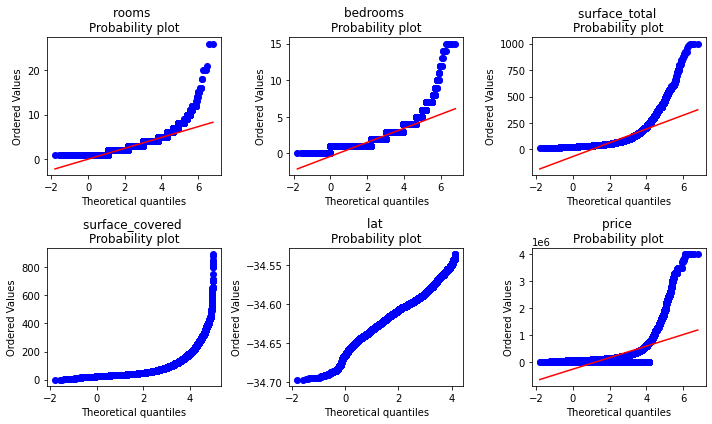

In [ ]:
#####################################################################################
#Extra
#Para verificar que las distribuciones son o no normales se puede aplicar el test de Kolmogorov-Smirnov. 
fig=plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
TestKol(Data_filtrado,'rooms')
plt.subplot(2,3,2)
TestKol(Data_filtrado,'bedrooms')
plt.subplot(2,3,3)
TestKol(Data_filtrado,'surface_total')
plt.subplot(2,3,4)
TestKol(Data_filtrado,'surface_covered')
plt.subplot(2,3,5)
TestKol(Data_filtrado,'lat')
plt.subplot(2,3,6)
TestKol(Data_filtrado,'lon')
plt.tight_layout()
TestKol(Data_filtrado,'price')
plt.tight_layout()
fig.patch.set_facecolor('xkcd:white')
#Para que se tenga una distribución normal el stats.kstest tiene que tender a cero
##################################################################################
#Inicialmente no parecerían tener un comportamiento normal las variables. 
#Es por esto que se decide tratar los outliers de la distribución y ver si no estarían afectandola.
#Esto me permitirá decidir el tipo de tratamiento de los valores faltantes.

In [ ]:
Data_filtrado.describe(percentiles=[0.01,.25, .5, .75,0.99]).T
#inicialmente si observo el percentil 1 y 99 vs el maximo y minimo de la distribución me puede dar idea de posibles outliers.


,count,mean,std,min,1%,25%,50%,75%,99%,max
lat,76808.0,-34.598476,0.023625,-34.696419,-34.657132,-34.612475,-34.598771,-34.584125,-3.454503e+01,-3.453591e+01
lon,76808.0,-58.435063,0.035982,-58.530468,-58.519630,-58.458153,-58.432834,-58.409361,-5.836178e+01,-5.835393e+01
rooms,80942.0,3.008463,1.311359,1.000000,1.000000,2.000000,3.000000,4.000000,7.000000e+00,2.600000e+01
bedrooms,80942.0,2.001384,1.053069,0.000000,1.000000,1.000000,2.000000,3.000000,5.000000e+00,1.500000e+01
bathrooms,80062.0,1.552259,0.850681,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000e+00,1.400000e+01
surface_total,80942.0,95.444145,77.650992,15.000000,26.000000,49.000000,71.000000,111.000000,4.050000e+02,1.000000e+03
surface_covered,80439.0,82.071358,61.704946,1.000000,25.000000,44.000000,63.000000,96.000000,3.350000e+02,8.910000e+02
price,80942.0,261996.691915,293380.802988,6000.000000,60000.000000,125000.000000,179800.000000,280000.000000,1.600000e+06,4.000000e+06


*  Primer tratamiento: Detección y eliminación de Outliers

In [ ]:
#Dado que los atributos no parecen seguir una distribución normal, no sería correcto realizar tratamiento de outlier con el método de 3 sigmas, dado que es influenciado por la media de la distribución que estaría sesgada hacia valores extremos.
#Es por esto que se tratarán los outliers con el método IQR

L_inf_1,L_sup_1,_,_,_,_= eliminarOutliersIQR(Data_filtrado,'rooms')
L_inf_2,L_sup_2,_,_,_,_= eliminarOutliersIQR(Data_filtrado,'bedrooms')
L_inf_3,L_sup_3,_,_,_,_= eliminarOutliersIQR(Data_filtrado,'bathrooms')
L_inf_4,L_sup_4,_,_,_,_= eliminarOutliersIQR(Data_filtrado,'surface_total')
L_inf_5,L_sup_5,_,_,_,_= eliminarOutliersIQR(Data_filtrado,'surface_covered')
L_inf_6,L_sup_6,_,_,_,_= eliminarOutliersIQR(Data_filtrado,'price')


print('Los valores de los límites extremos (L_inf,L_sup) de rooms: '+str((L_inf_1,L_sup_1)))
print('Los valores de los límites extremos (L_inf,L_sup) de bedrooms: '+str((L_inf_2,L_sup_2)))
print('Los valores de los límites extremos (L_inf,L_sup) de bathrooms: '+str((L_inf_3,L_sup_3)))
print('Los valores de los límites extremos (L_inf,L_sup) de surface_total: '+str((L_inf_4,L_sup_4)))
print('Los valores de los límites extremos (L_inf,L_sup) de surface_covered: '+str((L_inf_5,L_sup_5)))
print('Los valores de los límites extremos (L_inf,L_sup) de price: '+str((L_inf_6,L_sup_6)))

#Se observa que los límites inferiores son todos negativos en variables cuyo valor mínimo sólo puede ser cero (0). entonces se reamplazan los límites inferiores de mis variables por cero para filtrar el dataset. Los valores que sean filtrados por debajo del límite inferior serían valores atípicos.
#Si se chequea lo que devuelven los print siguientes son los outliers obtenidos respecto del límite superior. Esto es coherente ya que las distribuciones presentan una asimetría positiva en su distribución, con mínimo en cero.
print('La cantidad total de outliers de rooms: '+str((eliminarOutliersIQR(Data_filtrado,'rooms')[-1])))
print('La cantidad total de outliers de bedrooms: '+str((eliminarOutliersIQR(Data_filtrado,'bedrooms')[-1])))
print('La cantidad total de outliers de bathrooms: '+str((eliminarOutliersIQR(Data_filtrado,'bathrooms')[-1])))
print('La cantidad total de outliers de surface_total: '+str((eliminarOutliersIQR(Data_filtrado,'surface_total')[-1])))
print('La cantidad total de outliers de surface_covered: '+str((eliminarOutliersIQR(Data_filtrado,'surface_covered')[-1])))
print('La cantidad total de outliers de price: '+str((eliminarOutliersIQR(Data_filtrado,'price')[-1])))

Los valores de los límites extremos (L_inf,L_sup) de rooms: (0.0, 7.0)
Los valores de los límites extremos (L_inf,L_sup) de bedrooms: (0.0, 6.0)
Los valores de los límites extremos (L_inf,L_sup) de bathrooms: (0.0, 3.5)
Los valores de los límites extremos (L_inf,L_sup) de surface_total: (0.0, 204.0)
Los valores de los límites extremos (L_inf,L_sup) de surface_covered: (0.0, 174.0)
Los valores de los límites extremos (L_inf,L_sup) de price: (0.0, 512500.0)
La cantidad total de outliers de rooms: 632
La cantidad total de outliers de bedrooms: 265
La cantidad total de outliers de bathrooms: 2835
La cantidad total de outliers de surface_total: 6045
La cantidad total de outliers de surface_covered: 5784
La cantidad total de outliers de price: 6970


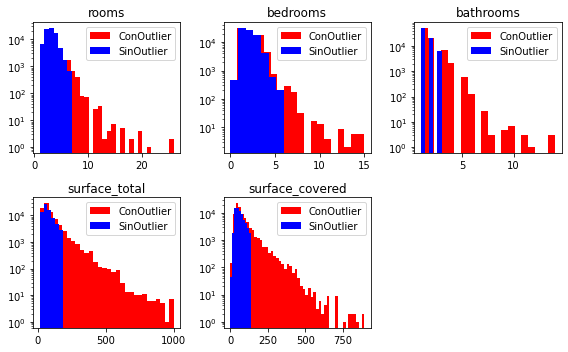

In [ ]:
#Grafico el pre y post procesamiento de outlier para ver las diferencias. 
#(Observación: no hago el filtro en precios porque no es un atributo sino mi variable a predecir, la cual la dejaré sin modificaciones.)
#Es importante observar que la función primero se aplica a Data_filtrado y luego a Data_filtrado_wtOut porque sino no se reescribiría sin los outliers.
Data_filtrado_wtOut=eliminarOutliersIQR(Data_filtrado,'rooms')[2]
fig=plt.figure(figsize=(8,5))
plt.subplot(2,3,1)
plt.hist(Data_filtrado["rooms"], 30, histtype='bar', stacked=True, color='red',label='ConOutlier')
plt.hist(Data_filtrado_wtOut["rooms"], 7, histtype='bar', stacked=True,color='blue',label='SinOutlier')
plt.yscale('log')
plt.title("rooms")
plt.legend()


Data_filtrado_wtOut=eliminarOutliersIQR(Data_filtrado_wtOut,'bedrooms')[2]
plt.subplot(2,3,2)
plt.hist(Data_filtrado["bedrooms"], 20, histtype='bar', stacked=True, color='red',label='ConOutlier')
plt.hist(Data_filtrado_wtOut["bedrooms"], 7, histtype='bar', stacked=True,color='blue',label='SinOutlier')
plt.yscale('log')
plt.title("bedrooms")
plt.legend()

Data_filtrado_wtOut=eliminarOutliersIQR(Data_filtrado_wtOut,'bathrooms')[2]
plt.subplot(2,3,3)
plt.hist(Data_filtrado["bathrooms"], 20, histtype='bar', stacked=True, color='red',label='ConOutlier')
plt.hist(Data_filtrado_wtOut["bathrooms"], 5, histtype='bar', stacked=True,color='blue',label='SinOutlier')
plt.yscale('log')
plt.title("bathrooms")
plt.legend()

Data_filtrado_wtOut=eliminarOutliersIQR(Data_filtrado_wtOut,'surface_total')[2]
plt.subplot(2,3,4)
plt.hist(Data_filtrado["surface_total"], 30, histtype='bar', stacked=True, color='red',label='ConOutlier')
plt.hist(Data_filtrado_wtOut["surface_total"], 6, histtype='bar', stacked=True,color='blue',label='SinOutlier')
plt.yscale('log')
plt.title("surface_total")
plt.legend()

Data_filtrado_wtOut=eliminarOutliersIQR(Data_filtrado_wtOut,'surface_covered')[2]
plt.subplot(2,3,5)
plt.hist(Data_filtrado["surface_covered"], 50, histtype='bar', stacked=True, color='red',label='ConOutlier')
plt.hist(Data_filtrado_wtOut["surface_covered"],10, histtype='bar', stacked=True,color='blue',label='SinOutlier')
plt.yscale('log')
plt.title("surface_covered")
plt.legend()
plt.tight_layout()

fig.patch.set_facecolor('xkcd:white')
#respecto al método IQR los que más poseian valores extremos eran Surface covered y total.

Datos con outliers:  (80942, 15)
Datos sin outliers:  (69450, 15)


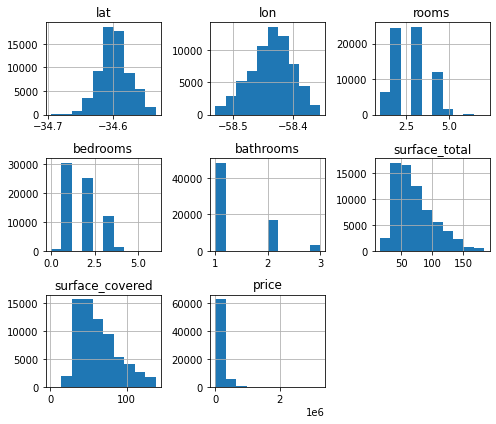

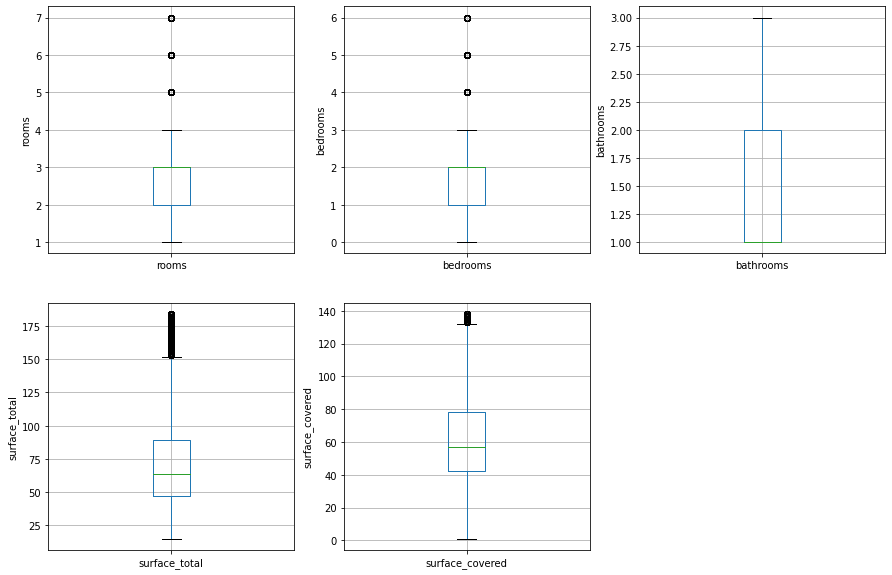

In [ ]:
Data_filtrado_wtOut.hist(figsize=(7,6))
plt.tight_layout()

print('Datos con outliers: ',Data_filtrado.shape)
print('Datos sin outliers: ',Data_filtrado_wtOut.shape)


#Boxplot post eliminacion outlier (si bien la grafica muestra outliers, esto se basan en un nuevo metodo de IQR que emplea sobre nuevos datos, pero respecto al dataset anterior no tiene outliers)
fig=plt.figure(figsize=(15,10))
plt.subplot(2,3, 1)
fig = Data_filtrado_wtOut.boxplot(column='rooms')
fig.set_title('')
fig.set_ylabel('rooms')

plt.subplot(2,3, 2)
fig = Data_filtrado_wtOut.boxplot(column='bedrooms')
fig.set_title('')
fig.set_ylabel('bedrooms')

plt.subplot(2,3, 3)
fig = Data_filtrado_wtOut.boxplot(column='bathrooms')
fig.set_title('')
fig.set_ylabel('bathrooms')

plt.subplot(2,3, 4)
fig = Data_filtrado_wtOut.boxplot(column='surface_total')
fig.set_title('')
fig.set_ylabel('surface_total')

plt.subplot(2,3, 5)
fig = Data_filtrado_wtOut.boxplot(column='surface_covered')
fig.set_title('')
fig.set_ylabel('surface_covered')

fig.patch.set_facecolor('xkcd:white')

*  Segundo tratamiento: Imputación de valores faltantes

Cantidad de datos faltantes por atributos:
start_date            0
end_date              0
lat                3220
lon                3220
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms           775
surface_total         0
surface_covered     456
price                 0
title                 0
description           0
property_type         0
dtype: int64
RatioNaN: 
 lon                4.636429
lat                4.636429
bathrooms          1.115911
surface_covered    0.656587
property_type      0.000000
description        0.000000
title              0.000000
price              0.000000
surface_total      0.000000
bedrooms           0.000000
rooms              0.000000
l3                 0.000000
l2                 0.000000
end_date           0.000000
start_date         0.000000
dtype: float64


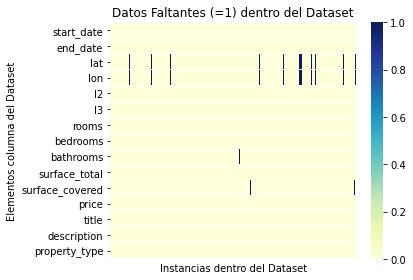

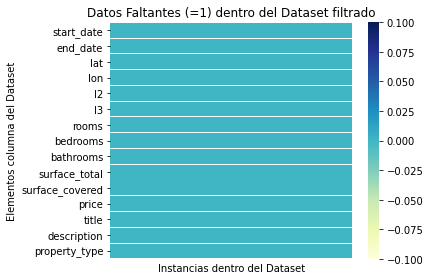

In [ ]:
#Analizo cuántos valores faltantes (NaN) hay por cada columna del DataFrame.

#Una forma rápida de ver si existen datos faltantes o NaN es contar los elementos faltantes por cada columna, para ello utilizo la operación isna() que consulta en cada celda del DataFrame si es un valor NaN.
#En este caso los datos faltantes están descriptos con el NaN, existen casos donde la celda esté vacía o con otro codigo.
#Esto se puede resolver en la lectura del csv, con la opción de pandas df = pd.read_csv("data.csv", na_values = missing_values) con missing_values = ["codigo"]
print('Cantidad de datos faltantes por atributos:')
print(Data_filtrado_wtOut.isna().sum())
print('RatioNaN: \n',(((Data_filtrado_wtOut.isna().sum())/len(Data_filtrado_wtOut))*100).sort_values(ascending=False))

#Gráficamente podemos ver en color dónde están los datos faltantes dentro del dataset, esto ayuda para tener una idea dentro de la estructura de los datos.
Dat=Data_filtrado_wtOut.isnull()
heat=sns.heatmap(Dat.T,  cmap="YlGnBu",xticklabels=False)
plt.title('Datos Faltantes (=1) dentro del Dataset')
plt.xlabel('Instancias dentro del Dataset')
plt.ylabel('Elementos columna del Dataset')
plt.tight_layout()
plt.show()


#El filtrado inicial que se propone para estar en las mismas condiciones que el proyecto 1 genera que muchos datos faltantes sean descartados y sólo quedan datos faltantes en lat, lon, baños y superficie cubierta.
#En este caso al hacer el tratamiento de los outliers se observa que los atributos que poseen datos faltantes siguen siendo los mismos pero con menor cantidad. Los datos Lat y Lon son datos sensible a cambios espaciales, hacer una imputación por algún estadístico puede ser delicado.
#Una posible estrategia sería imputarlo por el valor medio de aquellos valores que tienen lat lon respecto a la coincidencia del barrio ó el centroide espacial en lat-lon del barrio, pero esto es valido para polígonos no convexos (es decir que el centroide espacial caiga dentro del barrio). Otra posible forma de tratarlos es con un knnimputer, usando las instancias más cercanas.
#Dado que es un tema en sí mismo, considero dada la poca cantidad de elementos (alrededor del 5% del total) y viendo graficamente que se encuentran en las mismas posiciones (Es decir que el par está faltante). Decido eliminarlos directamente.
#Por otra parte imputo a los Nan de bathrooms y surface covered con su mediana.
Data_filtrado_wtOut['bathrooms'].fillna(Data_filtrado_wtOut['bathrooms'].median(), inplace = True)
Data_filtrado_wtOut['surface_covered'].fillna(Data_filtrado_wtOut['surface_covered'].median(), inplace = True)

Data_filtrado_wtOut.dropna(inplace=True)
Dat=Data_filtrado_wtOut.isnull()
heat=sns.heatmap(Dat.T,  cmap="YlGnBu",xticklabels=False)
plt.title('Datos Faltantes (=1) dentro del Dataset filtrado')
plt.xlabel('Instancias dentro del Dataset')
plt.ylabel('Elementos columna del Dataset')
plt.tight_layout()
plt.show()


--------------------------
Observación: Si no se hubiese hecho el filtro inicial, los atributos que hubiesen tenido datos faltantes serían:
<a href="https://imgbb.com/"><img src="https://i.ibb.co/8nk1QND/1.png" alt="1" border="0"></a>

    Las columnas completas son ['start_date','end_date','l1','l2,'l3','rooms','bedrooms','price','title','description','property_type']
    Las columnas incompletas (con datos faltantes) son ['lat','lon','bathrooms','surface_total','surface_covered']

En este caso como las distribuciones tienden en la mayoría de los casos a tener una asimetría positiva y no presentan una distribución normal. Se podría imputar los datos faltantes de bathrooms, surface_total y surface_covered con la mediana ó la moda atraves de:
*  opción 1 con fillna:
Dado que los datos difieren entre tipo de propiedad uno puede imputar valores para cada tipo.


    valores_medios = dataset_sin.groupby('property_type')['atributo'].mean()
    valores_medios_bano = dict(round(valores_medios_bano))
    dataset_sin.atributo = dataset_sin.bathrooms.fillna(dataset.property_type.map(valores_medios_bano))
    
*  opción 2 con scikit learn (https://scikit-learn.org/stable/modules/impute.html)


    imp = SimpleImputer(strategy="most_frequent")
    Datos_prop =pd.DataFrame(imp.fit_transform(Datos_prop))

Esta decisión debe pasar por un control de las distribuciones luego de la imputación para ver si el cambio es coherente, sino se usaría algún otro método de imputación. Se realizó aparte el tratamiento de imputación de datos faltantes sin tener que hacer el filtro inicial del proyecto 1 y se vio que la diferencia en el impacto de los modelos es marginal (resultados similares encontrados con los tratamientos en las próximas celdas. Resultados no mostrados)


--------------------------

*  **Tercer tratamiento**: Encoding para variables categóricas

In [ ]:
#En este caso las variables categóricas que podrían influir en un modelo son  l3 y property_type
#Con el filtro inicial l2 no aporta información útil ya que sólo son propiedades de Capital Federal. 
#De "tittle" y "description" se puede obtener mucha información mas sin un procesamiento de texto adecuado no es posible obtener algo importante. 
#Es por esto que se descartan estas variables junto a las fechas y se aprovecha a encodear los barrios de Capital Federal y el tipo de propiedad, que en el proyecto anterior se ha visto que la distribución de las mismas parecían tener una importancia implícita en el precio pero que no había sido analizado en un modelo directamente.
Data_filtrado_wtOut.drop(['start_date','end_date','l2','title','description'], axis=1, inplace=True)

#Apartir de esto se decide encodear las variables categóricas l3 y property type usando. 
#En este caso como no son variables ordinales se realiza un OneHot Encoding que me separa las variables en dummies, no ordinales.
#Observación: como quiero hacer un encoding específico en dos columnas categóricas. Utilizo el pd.get_dummies el cual es más flexible que el OH de sklearn.
#La flexibilidad está en que puedo encodear cuantas columnas categoricas quiero y etiquetarlas con un prefijo para facilitar la diferenciación.
#https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

#Para el tipo de propiedad
P_types = Data_filtrado_wtOut['property_type']
D_df = pd.DataFrame(P_types, columns=['property_type'])# generate binary values using get_dummies
dum_df = pd.get_dummies(D_df, columns=["property_type"], prefix=["Type_is"] )# merge with main df bridge_df on key values
Data_filtrado_wtOut = Data_filtrado_wtOut.join(dum_df)
Data_filtrado_wtOut

#Para el tipo de barrio
P_types = Data_filtrado_wtOut['l3']
D_df = pd.DataFrame(P_types, columns=['l3'])# generate binary values using get_dummies
dum_df = pd.get_dummies(D_df, columns=["l3"], prefix=["Barrio_"] )# merge with main df bridge_df on key values
Data_filtrado_wtOut = Data_filtrado_wtOut.join(dum_df)
Data_filtrado_wtOut

#CUIDADO! corra 1 sola vez esta celda sino seguirá agregando al dataset variables debido al .join()



,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,Type_is_Casa,Type_is_Departamento,Type_is_PH,Barrio__Abasto,Barrio__Agronomía,Barrio__Almagro,Barrio__Balvanera,Barrio__Barracas,Barrio__Barrio Norte,Barrio__Belgrano,Barrio__Boca,Barrio__Boedo,Barrio__Caballito,Barrio__Catalinas,Barrio__Centro / Microcentro,Barrio__Chacarita,Barrio__Coghlan,Barrio__Colegiales,Barrio__Congreso,Barrio__Constitución,Barrio__Flores,Barrio__Floresta,Barrio__Las Cañitas,Barrio__Liniers,Barrio__Mataderos,Barrio__Monserrat,Barrio__Monte Castro,Barrio__Nuñez,Barrio__Once,Barrio__Palermo,Barrio__Parque Avellaneda,Barrio__Parque Centenario,Barrio__Parque Chacabuco,Barrio__Parque Chas,Barrio__Parque Patricios,Barrio__Paternal,Barrio__Pompeya,Barrio__Puerto Madero,Barrio__Recoleta,Barrio__Retiro,Barrio__Saavedra,Barrio__San Cristobal,Barrio__San Nicolás,Barrio__San Telmo,Barrio__Tribunales,Barrio__Velez Sarsfield,Barrio__Versalles,Barrio__Villa Crespo,Barrio__Villa Devoto,Barrio__Villa General Mitre,Barrio__Villa Lugano,Barrio__Villa Luro,Barrio__Villa Ortuzar,Barrio__Villa Pueyrredón,Barrio__Villa Real,Barrio__Villa Riachuelo,Barrio__Villa Santa Rita,Barrio__Villa Soldati,Barrio__Villa Urquiza,Barrio__Villa del Parque
1,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-34.593779,-58.441239,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,-34.600988,-58.433061,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89866,-34.582439,-58.432875,Palermo,4.0,3.0,2.0,103.0,98.0,660000.0,Departamento,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89867,-34.581699,-58.433547,Palermo,4.0,2.0,3.0,159.0,98.0,539000.0,Departamento,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89868,-34.581308,-58.431236,Palermo,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89869,-34.585355,-58.427194,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


*  **Cuarto Tratamiento**: Estandarización 

La importancia del escalado en este caso es crucial ya que utilizaré modelos que involucren ajustes (regresiones) u operaciones de distancias. Al hacer esto permito desligarme de las unidades de mis datos y dejarlas en unas comparables entre sí para no confundir a mi modelo.

  En este caso es importante tener en cuenta que la estandarización en todas las instancias debe realizarse después de dividir los datos entre el entrenamiento y el conjunto de prueba, utilizando solo los datos del conjunto de entrenamiento. Esto se debe a que el conjunto de prueba desempeña el papel de datos nuevos no vistos, por lo que no se supone que sea accesible en la etapa de entrenamiento.

**Importante:** Teniendo en cuenta que las distribuciones de datos en general presentan asimetrías, alejandonos de aplicar el supuesto que la distribución poblacional de los atributos es Normal. Entonces empleo un preprocesamiento que implica los percentiles y el método IQR, el cual no se sesgará ante distribuciones no normales .
En este caso el valor estandarizado se calcula como (value – median) / (p75 – p25) [RobustScaler](https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/) 
[RobustScaler2](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)
La unidad de los datos escalados serán unidades de IQR en función de cuánta distancia estoy respecto a la mediana de mis datos.

In [ ]:
Model_data=Data_filtrado_wtOut #renombro la variable para saber cuál pondré en mi modelo.
#defino mi variable target y por el momento dejo todas las variables excepto l3 y property type

y=(Model_data['price'].values)/float(1000000)  #MI VARIABLE A MODELAR
#Esta división es para interpretar mejor las metricas.(todos los valores están en escala 1:1e6)

#aveces esta división genera valores no esperados. por los que uso la siguiete línea
Model_data.replace([np.inf, -np.inf], np.nan, inplace=True)
Model_data.fillna(999, inplace=True)

X=Model_data.drop(["price",'l3','property_type'],axis=1) #MIS ATRIBUTOS CON QUE QUIERO MODELAR EL PRECIO, extraigo las variables no numericas.

print(y.shape)
print(X.shape)

(66230,)
(66230, 67)


In [ ]:
# Test-Train Split. 
X_dev,X_held,y_dev,y_held = train_test_split(X,y,test_size=0.3,random_state=42) 

# Escalo todos los atributos
scaler = RobustScaler() 
X_dev_sc=  pd.DataFrame(scaler.fit_transform(X_dev))
#es importante notar que al hacer el escalado lo que devuelve es un array, por lo que se vuelve a transformar en DataFrame para manipular los datos de forma más ordenada.
X_held_sc= pd.DataFrame(scaler.transform(X_held)) #son instancias que supongo que vendran despues y no los escalos.


print(X_dev.shape, y_dev.shape, X_held.shape, y_held.shape)

(46361, 67) (46361,) (19869, 67) (19869,)


**B.** Re entrenar un modelo del Proyecto 01 y comparar su desempeño con el modelo obtenido en el Proyecto 01. Una aclaración: con reentrenar nos referimos a usar el mismo proceso de entrenamiento junto con sus hiperparámetros. Pero puede ocurrir - y, de hecho, se espera - que el dataset contenga más atributos que los utilizados en el Proyecto 01.



Raíz del error cuadrático medio en Train: [0.1604, 0.0506]
Raíz del error cuadrático medio en Test: [0.1731, 0.0592]


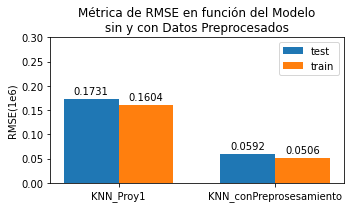

In [ ]:
#Utilizo como benchmark el mejor modelo elegido por mi del proyecto 1
#KNN Regresor con 9 vecinos y distancia Euclidiana

knn_regressor = KNeighborsRegressor(n_neighbors=9,p=2)

X_dev,X_held,y_dev,y_held
knn_regressor.fit(X_dev, y_dev)
#analizo el comportamiento del RMSE y el balance entre mis datos de testeo y entrenamiento
y_train_pred = knn_regressor.predict(X_dev)
y_test_pred = knn_regressor.predict(X_held)

#Realizo esta lista para comparar con el resultado del proy 1
rmse_test = [0.1731]
rmse_train = [0.1604]
rmse_train.append(RMSE(y_dev, y_train_pred))
rmse_test.append(RMSE(y_held, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

#Grafico la metrica en funcion del modelo y los datos train/test
labels = ['KNN_Proy1','KNN_conPreprosesamiento']
x = np.arange(len(labels))
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(5,3))
rects1 = ax.bar(x - width/2, rmse_test, width, label='test')
rects2 = ax.bar(x + width/2, rmse_train, width, label='train')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE(1e6)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(0, 0.3)
autolabel(rects1)
autolabel(rects2)
plt.title('Métrica de RMSE en función del Modelo\n sin y con Datos Preprocesados ')
fig.tight_layout()

fig.patch.set_facecolor('xkcd:white')
plt.show()

#En este caso el KNN con los datos preprocesados muestran una reducción del error en aprox 65% en Test y 68 en Train. 
#Esto podría ser una mejora interesante pero no hay que olvidar que también se estaría tendiendo a un sobreajuste de los datos según se observó en el proyecto anterior (ver Breve Resumen al inicio de este proyecto).

Raíz del error cuadrático medio en Train: [0.1354, 0.0244]
Raíz del error cuadrático medio en Test: [0.1612, 0.0551]


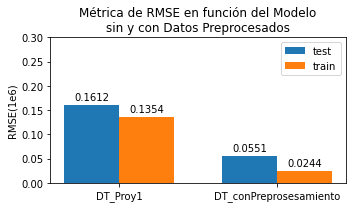

In [ ]:
tree_regressor = DecisionTreeRegressor(max_depth=15, random_state=20)
tree_regressor.fit(X_dev, y_dev)

#analizo el comportamiento del RMSE y el balance entre mis datos de testeo y entrenamiento
y_train_pred = tree_regressor.predict(X_dev)
y_test_pred = tree_regressor.predict(X_held)

#Realizo esta lista para comparar con el resultado del proy 1
rmse_test = [0.1612]
rmse_train = [0.1354]
rmse_train.append(RMSE(y_dev, y_train_pred))
rmse_test.append(RMSE(y_held, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

#Grafico la metrica en funcion del modelo y los datos train/test
labels = ['DT_Proy1','DT_conPreprosesamiento']
x = np.arange(len(labels))
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(5,3))
rects1 = ax.bar(x - width/2, rmse_test, width, label='test')
rects2 = ax.bar(x + width/2, rmse_train, width, label='train')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE(1e6)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(0, 0.3)
autolabel(rects1)
autolabel(rects2)
plt.title('Métrica de RMSE en función del Modelo\n sin y con Datos Preprocesados ')
fig.tight_layout()

fig.patch.set_facecolor('xkcd:white')
plt.show()


#En este caso el DT con los datos preprocesados muestran una reducción del error en aprox 65% en Test y Train 81% . 
#Esto podría ser una mejora interesante pero no hay que olvidar que también se estaría tendiendo a un sobreajuste de los datos según se observó en el proyecto anterior (ver Breve Resumen al inicio de este proyecto).

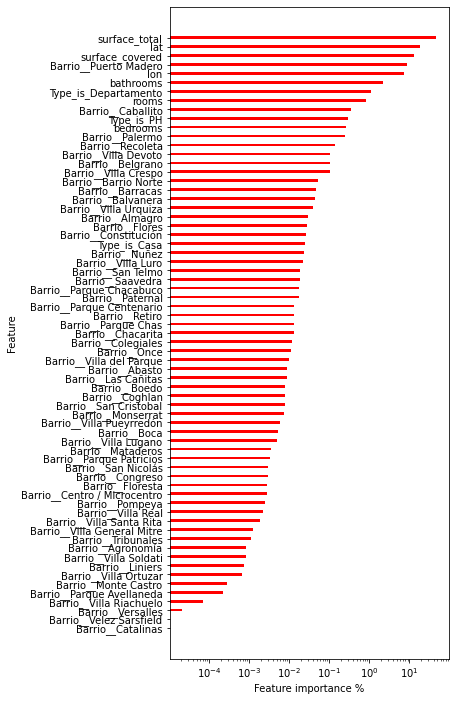

In [ ]:
#Analizo la importancia de los atributos
df_c=pd.DataFrame(tree_regressor.feature_importances_*100)
df_c['atributos']=X_dev.columns
df_c = df_c.sort_values(by=[0])

plt.figure(figsize=(5,12))
plt.barh(df_c.atributos,df_c[0],height=0.3,align='center', color='red')
plt.xlabel('Feature importance %')
plt.ylabel('Feature')
plt.xscale('log')

fig.patch.set_facecolor('xkcd:white')
plt.show()


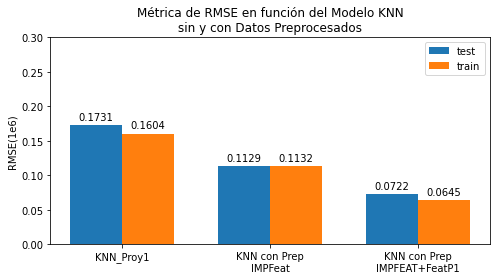

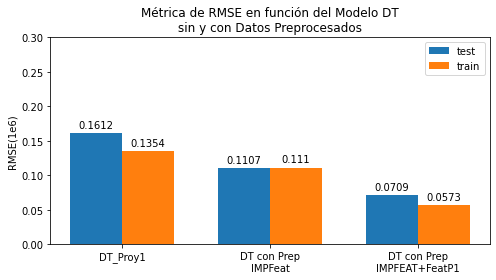

In [ ]:
X_new=Model_data[['Barrio__Villa del Parque','Barrio__Villa Urquiza','Barrio__Villa Soldati','Barrio__Villa Santa Rita','Barrio__Villa Riachuelo','Barrio__Villa Real','Barrio__Villa Pueyrredón','Barrio__Villa Ortuzar','Barrio__Villa Luro']]
X_new2=Model_data[['bathrooms','surface_covered','surface_total','Barrio__Villa del Parque','Barrio__Villa Urquiza','Barrio__Villa Soldati','Barrio__Villa Santa Rita','Barrio__Villa Riachuelo','Barrio__Villa Real','Barrio__Villa Pueyrredón','Barrio__Villa Ortuzar','Barrio__Villa Luro']]

y=(Model_data['price'].values)/float(1000000)  #MI VARIABLE A MODELAR
#Esta división es para interpretar mejor las metricas.(todos los valores están en escala 1:1e6)

# Test-Train Split. 
X_dev,X_held,y_dev,y_held = train_test_split(X_new,y,test_size=0.3,random_state=42) 
X_dev2,X_held2,y_dev2,y_held2 = train_test_split(X_new2,y,test_size=0.3,random_state=42) 

# Escalo todos los atributos
scaler = RobustScaler() 
scaler2 = RobustScaler() 
X_dev_sc=  pd.DataFrame(scaler.fit_transform(X_dev))
X_dev_sc2=  pd.DataFrame(scaler2.fit_transform(X_dev2))

X_held_sc= pd.DataFrame(scaler.transform(X_held))
X_held_sc2= pd.DataFrame(scaler2.transform(X_held2))



knn_regressor = KNeighborsRegressor(n_neighbors=9,p=2)
knn_regressor2 = KNeighborsRegressor(n_neighbors=9,p=2)

knn_regressor.fit(X_dev, y_dev)
knn_regressor2.fit(X_dev2, y_dev2)

tree_regressor = DecisionTreeRegressor(max_depth=15, random_state=20)
tree_regressor2 = DecisionTreeRegressor(max_depth=15, random_state=20)

tree_regressor.fit(X_dev, y_dev)
tree_regressor2.fit(X_dev2, y_dev2)

#analizo el comportamiento del RMSE y el balance entre mis datos de testeo y entrenamiento
y_train_pred = knn_regressor.predict(X_dev)
y_test_pred = knn_regressor.predict(X_held)

y_train_pred2 = knn_regressor2.predict(X_dev2)
y_test_pred2 = knn_regressor2.predict(X_held2)

#Realizo esta lista para comparar con el resultado del proy 1
rmse_test = [0.1731]
rmse_train = [0.1604]
rmse_train.append(RMSE(y_dev, y_train_pred))
rmse_test.append(RMSE(y_held, y_test_pred))
rmse_train.append(RMSE(y_dev2, y_train_pred2))
rmse_test.append(RMSE(y_held2, y_test_pred2))
#Grafico la metrica en funcion del modelo y los datos train/test
labels = ['KNN_Proy1','KNN con Prep\nIMPFeat','KNN con Prep\nIMPFEAT+FeatP1']
x = np.arange(len(labels))
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(7,4))
rects1 = ax.bar(x - width/2, rmse_test, width, label='test')
rects2 = ax.bar(x + width/2, rmse_train, width, label='train')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE(1e6)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(0, 0.3)
autolabel(rects1)
autolabel(rects2)
plt.title('Métrica de RMSE en función del Modelo KNN\n sin y con Datos Preprocesados ')
fig.tight_layout()

fig.patch.set_facecolor('xkcd:white')
plt.show()



#analizo el comportamiento del RMSE y el balance entre mis datos de testeo y entrenamiento
y_train_pred = tree_regressor.predict(X_dev)
y_test_pred = tree_regressor.predict(X_held)

y_train_pred2 = tree_regressor2.predict(X_dev2)
y_test_pred2 = tree_regressor2.predict(X_held2)
#Realizo esta lista para comparar con el resultado del proy 1
rmse_test = [0.1612]
rmse_train = [0.1354]
rmse_train.append(RMSE(y_dev, y_train_pred))
rmse_test.append(RMSE(y_held, y_test_pred))

rmse_train.append(RMSE(y_dev2, y_train_pred2))
rmse_test.append(RMSE(y_held2, y_test_pred2))

#Grafico la metrica en funcion del modelo y los datos train/test
labels = ['DT_Proy1','DT con Prep\nIMPFeat','DT con Prep\nIMPFEAT+FeatP1']
x = np.arange(len(labels))
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(7,4))
rects1 = ax.bar(x - width/2, rmse_test, width, label='test')
rects2 = ax.bar(x + width/2, rmse_train, width, label='train')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE(1e6)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(0, 0.3)
autolabel(rects1)
autolabel(rects2)
plt.title('Métrica de RMSE en función del Modelo DT\n sin y con Datos Preprocesados ')
fig.tight_layout()

fig.patch.set_facecolor('xkcd:white')
plt.show()



#Con  la modificación eligiendo las variables de mayor importancia del dataset preprocesado vemos que ahora tanto para el modelo KNN y DT la mejora es menor que la vista con todos los features.
#Para el KNN la disminución del error en test fue de aprox 34% y  train 29% aprox
#Para el DT la disminución del error en test fue de aprox 31% y train un 18%.

#Se realiza una segunda modificación sumando las variables de mayor importancia del proyecto 1 vemos que ahora tanto para el modelo KNN y DT la mejora es buena pero no menor que con todos los features.
#Para el KNN la disminución del error en test fue de 58% y  train 59% aprox
#Para el DT la disminución del error en test 56%  y train fue de 57%

Apartir de estos resultados se puede observar que un preprocesamiento de los datos contribuyó a la disminución del error respecto a los encontrados en el primer proyecto, tanto para los datos de entrenamiento como de testeo.


Sin embargo, la elección de estos modelos puede siguir viendose afectada a que la separación de mis datos generan resultados segados a éstos mismos. Además los hiperparámetros de estos modelos sólo se buscaron a mano como en el proyecto 1 y no con un criterio más riguroso.
Es por esto que se propone hacer un análisis más exhaustivo aprovechando las herramientas de Cross Validation y Grid o Random Search para obtener un score más concluyente.




In [ ]:
#Parto de la misma separación de los datos que antes.
X=X.copy()
y=y.copy()
# Test-Train Split. 
X_dev,X_held,y_dev,y_held = train_test_split(X,y,test_size=0.3,random_state=42) 

# Escalo todos los atributos
scaler = RobustScaler() 
X_dev_sc=pd.DataFrame(scaler.fit_transform(X_dev))
#es importante notar que al hacer el escalado lo que devuelve es un array, por lo que se vuelve a transformar en DataFrame para manipular los datos de forma más ordenada.
X_held_sc= pd.DataFrame(scaler.transform(X_held)) #son instancias que supongo que vendran despues y no los escalos.

print(X_dev.shape, y_dev.shape, X_held.shape, y_held.shape)



(46361, 67) (46361,) (19869, 67) (19869,)


In [ ]:
#Indago en el parámetro más óptimo de acuerdo a las variables que se analizaron en el proyecto 1.
#Analizo con el Randomsearch ya que el costo computacional es menor. A partir de eso indago en una grilla fina con Gridsearch para tener más certeza de la optimización.

#Con RandomSearch
rgr_tree = DecisionTreeRegressor(random_state=42)
param_rndm={'max_depth': np.arange(2, 20)}
dtr_rndm_cv = RandomizedSearchCV(rgr_tree, 
                           param_distributions=param_rndm,
                            cv=5,scoring='neg_root_mean_squared_error',n_iter=100)
dtr_rndm_cv.fit(X_dev_sc, y_dev)


print('The best parameteres after RandomSearchCV', dtr_rndm_cv.best_params_)
print('The best estimator after RandomSearchCV',dtr_rndm_cv.best_estimator_)
print('The best score (RMSE(1e6)) after RandomSearchCV',-dtr_rndm_cv.best_score_)

 

The best parameteres after RandomSearchCV {'max_depth': 18}
The best estimator after RandomSearchCV DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=18,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')
The best score (RMSE(1e6)) after RandomSearchCV 0.04743309572402611


In [ ]:
#Con GridSearch hago un análisis más fino.
rgr_tree = DecisionTreeRegressor(random_state=42)
param_grid = {"max_depth":  np.arange(8,14)}
dtr_grid_cv = GridSearchCV(rgr_tree, param_grid, cv=5,scoring='neg_root_mean_squared_error')
dtr_grid_cv.fit(X_dev_sc, y_dev)

print('The best parameteres after GridsearchCV', dtr_grid_cv.best_params_)
print('The best estimator after GridSearchCV',dtr_grid_cv.best_estimator_)
print('The best score (RMSE(1e6)) after GridSearchCV',-dtr_grid_cv.best_score_)


The best parameteres after GridsearchCV {'max_depth': 13}
The best estimator after GridSearchCV DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=13,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')
The best score (RMSE(1e6)) after GridSearchCV 0.048024164014574315


In [ ]:
#analizo la performance en train y veo cómo se comporta con los datos test
y_pred_dev=dtr_grid_cv.predict(X_dev_sc)
y_pred_held=dtr_grid_cv.predict(X_held_sc)

#RMSE en TRAIN y TEST
print('Error (RMSE(1e6))en datos de test:',np.sqrt(mean_squared_error(y_held, y_pred_held)))
print('Error (RMSE(1e6))en datos de train:',np.sqrt(mean_squared_error(y_dev, y_pred_dev)))

#R2 en TRAIN y TEST
print('Error (R2)en datos de test:',r2_score(y_dev, y_pred_dev)) 
print('Error (R2)en datos de train:',r2_score(y_held, y_pred_held))

Error (RMSE(1e6))en datos de test: 0.05587799895131744
Error (RMSE(1e6))en datos de train: 0.03138221086685804
Error (R2)en datos de test: 0.9204957260927705
Error (R2)en datos de train: 0.7462671723102121


In [ ]:
#Hago el mismo análsis para Knn
#Con RandomSearch
knn = KNeighborsRegressor()
param_rndm = {'n_neighbors':np.arange(2,10),'p':[1,2]}
knn_rndm_cv = RandomizedSearchCV(knn,param_distributions=param_rndm,cv=5,scoring='neg_root_mean_squared_error',n_iter=100)
knn_rndm_cv.fit(X_dev_sc, y_dev)

print('The best parameteres after RandomSearchCV', knn_rndm_cv.best_params_)
print('The best estimator after RandomSearchCV',knn_rndm_cv.best_estimator_)
print('The best score (RMSE(1e6)) after RandomSearchCV',-knn_rndm_cv.best_score_)


The best parameteres after RandomSearchCV {'p': 1, 'n_neighbors': 4}
The best estimator after RandomSearchCV KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                    weights='uniform')
The best score (RMSE(1e6)) after RandomSearchCV 0.04545323149045362


In [ ]:
#Con GridSearch hago un análisis más fino.
knn = KNeighborsRegressor()
params = {'n_neighbors':np.arange(2,5),'p':[1,2]}
knr_grid_cv = GridSearchCV(knn, params, cv=5,scoring='neg_root_mean_squared_error', n_jobs=-1)
knr_grid_cv.fit(X_dev_sc, y_dev)
knr_grid_cv.best_params_
knr_grid_cv.best_estimator_
print('The best parameteres after GridsearchCV', knr_grid_cv.best_params_)
print('The best estimator after GridSearchCV',knr_grid_cv.best_estimator_)
print('The best score (RMSE(1e6)) after GridSearchCV',-knr_grid_cv.best_score_)

The best parameteres after GridsearchCV {'n_neighbors': 4, 'p': 1}
The best estimator after GridSearchCV KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                    weights='uniform')
The best score (RMSE(1e6)) after GridSearchCV 0.04545323149045362


In [ ]:
#Una vez que hayas elegido el que es el mejor modelo, reporta tu estimacion de la performance evaluando sobre el conjunto Held-out que separaste al principio
y_pred_dev=knr_grid_cv.predict(X_dev_sc)
y_pred_held=knr_grid_cv.predict(X_held_sc)

#RMSE en TRAIN y TEST
print('Error (RMSE(1e6))en datos de test:',np.sqrt(mean_squared_error(y_held, y_pred_held)))
print('Error (RMSE(1e6))en datos de train:',np.sqrt(mean_squared_error(y_dev, y_pred_dev)))

#R2 en TRAIN y TEST
print('Error (R2)en datos de test:',r2_score(y_dev, y_pred_dev)) 
print('Error (R2)en datos de train:',r2_score(y_held, y_pred_held))



Error (RMSE(1e6))en datos de test: 0.04539043580907777
Error (RMSE(1e6))en datos de train: 0.033322252688405586
Error (R2)en datos de test: 0.9103620099216976
Error (R2)en datos de train: 0.8325737021410486


Según lo observado en la optimización, con el uso de los datos preprocesados (usando todas las variables) y el análisis con validación cruzada y optimización de hiperparámetros, es obtuvo que 

El DT regressor óptimo es del de 13 de profundiad. Obteniendo un RMSE en test de 0.055 y de train de 0.031. Comparando con lo obtenido en el proyecto 1 (profundidad 15 con rmse_test = 0.1612 y rmse_train = 0.1354) se obtuvo un error un orden menor con la incorporación de las nuevas técnicas. Aunque el R2 muestra una mejora de aprox 18% entre el train y test, indicando una mejora ante nuevos datos.

 
El Knn regressor óptimo es del de 4 vecinos con p=1. obteniendo un RMSE en el test de 0.045 y de train: 0.033. Comparando con lo obtenido en el proyecto 1 (knn 9 ecinos y p=2 con  rmse_test = 0.1731 y rmse_train = 0.1604) Se obtiene una mejora del error. Y se observa que el R2 se ve un número favorable que podría indicar un modelo que se puede tener un rendimiento óptimo, con una diferencia del 8.5% en pos de los datos tests.

***Adicional***

Por último se indagó con una curva de aprendizaje, en función del RMSE cómo era la evolución de la metrica para datos test y train en función del número de datos de entrenamiento.  Esto me ayuda a decidir el mejor modelo que mejore mi métrica y me puede determinar cuánto podría aumentar el set de entrenamiento para mejorar o no el error.

Esto se realiza para determinar si los modelos replican un alto sesgo (curvas muy juntas, poco gap y convergen) ó alta varianza (curvas separadas con un train error bajo, gap alto).
En el mejor de los casos uno espera que el modelo tenga un gap, lo que determinaría que variando la cantidad de muestras el bias sigue siendo bajo (sin tender al underfitting), determinando que es un buen modelo (sin tender al overfitting).


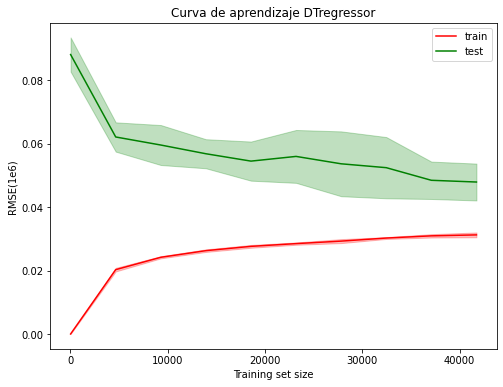

In [ ]:
#es importante tener en cuenta que los scorings son negativos, entonces para plotear los resultados hay que multiplicar los scores por -1
clf_1 = DecisionTreeRegressor(max_depth = 13)
train_sizes, train_scores, valid_scores = learning_curve(clf_1, X_dev_sc, y_dev, 
                                                         train_sizes = np.linspace(0.001,1,10),
                                                         scoring = 'neg_root_mean_squared_error', cv=10)
fig=plt.figure(figsize = (8,6))
plt.plot(train_sizes, (-1)*train_scores.mean(axis = 1), color = 'r',label='train')
plt.plot(train_sizes, (-1)*valid_scores.mean(axis = 1), color = 'g',label='test')
plt.fill_between(train_sizes, (-1)*train_scores.mean(axis = 1)+ train_scores.std(axis = 1),
                     (-1)*train_scores.mean(axis = 1)- train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, (-1)*valid_scores.mean(axis = 1) + valid_scores.std(axis = 1),
                     (-1)*valid_scores.mean(axis = 1)- valid_scores.std(axis = 1), alpha=0.25, color="g")
plt.title('Curva de aprendizaje DTregressor')
plt.ylabel('RMSE(1e6)')
plt.xlabel('Training set size')
plt.legend()

fig.patch.set_facecolor('xkcd:white')
plt.show()

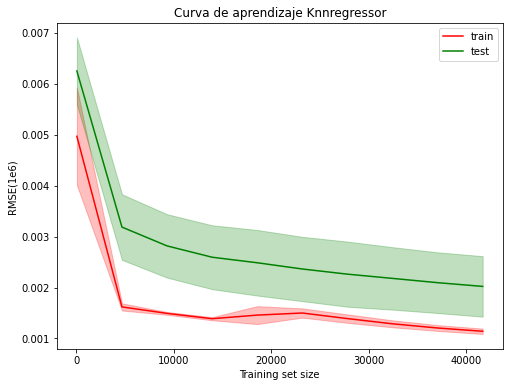

In [ ]:
clf_2 = KNeighborsRegressor(n_neighbors= 4, p=1)
train_sizes, train_scores, valid_scores = learning_curve(clf_2, X_dev_sc, y_dev, 
                                                         train_sizes = np.linspace(0.001, 1, 10),scoring="neg_mean_squared_error", cv=10)
plt.figure(figsize = (8,6))
plt.plot(train_sizes, (-1)*train_scores.mean(axis = 1), color = 'r',label='train')
plt.plot(train_sizes, (-1)*valid_scores.mean(axis = 1), color = 'g',label='test')

plt.fill_between(train_sizes, (-1)*train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     (-1)*train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes,(-1)* valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     (-1)*valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")
plt.title('Curva de aprendizaje Knnregressor')
plt.ylabel('RMSE(1e6)')
plt.xlabel('Training set size')
plt.legend()

fig.patch.set_facecolor('xkcd:white')
plt.show()


Analizando la curva de aprendizaje en ambos casos se tiene que se mantiene un gap entre los valores de train y test a medida qe se aumenta el numero de muestras de aprendizaje.

Lo que llama la atención es que el aumento del set de entrenamiento en el DT tiende a acortar el gap, lo que indicaría que el modelo tendería a disminuir su bias, pero para ello se necesitarían muchas más muestras. Sin embargo también nos da una buena noticia de que no se necesita agregar tanta información inicial en el entrenamiento ya que si bien el gap inicial es muy grande, con poco agregado de datos tiende a disminuir y además permite un modelo de bajo bias y alta varianza, lo suficiente para permitir una generalización.

En cuanto al KNN este resultado es menos atractivo ya que el gap es chico pero aumenta levemente  a mayor cantidad de muestras y se mantiene cuasi constante la separación en la curva de aprendizaje. Dado que el espacio es acotado daría idea de una tendencia a sobreajuste a medida que el conjunto de entrenamiento se amplia. 

**Conclusiones:**

1)Se reentrenó el modelo implementado en la Entrega 01 con este nuevo dataset transformado. Se ha visto una mejora en su desempeño primero debido al Preprocesamiento de los datos y luego por la optimización de los hiperparámetros.
El hecho de poder incluir la información categórica (barrios y tipo de propiedad) genera un valor agregado que, junto con las variables de importancia vistas en el proyecto previo, mejora el rendimiento del modelo. También tratar los outliers permite que datos no coherentes no sesgen a los modelos predictores, en especial en una regresión.

2) El modelo elegido en el primer Proyecto es el de Vecinos mas Cercanos con k_vecinos= 10, y con 4 atributos (habitaciones, baños, superficie total, superficie cubierta), en esta etapa elegiria nuevamente Vecinos mas Cercanos con k_vecinos= 13, y con todos los atributos, pero con la transformacion de datos.


3)En estos casos el preprocesamiento de datos es una tarea que se debe realizar de manera obligatoria. Los datos sin procesar son a menudo ruidosos y es posible que les falten valores. El uso de estos datos para el modelado puede producir resultados engañosos.
 Para mejorar la calidad de los datos y, por tanto, el rendimiento del modelo, es fundamental llevar a cabo un mantenimiento de datos para detectar problemas de datos al principio y decidir acerca de los pasos de limpieza y preprocesamiento de datos correspondientes. La exploración de los datos ofrece una vista anticipada de los datos. Se pueden detectar una serie de problemas de datos durante este paso y se pueden aplicar los métodos correspondientes para solucionarlos. Es importante formular preguntas como ¿cuál es la causa del problema y cómo se ha podido producir el problema? Este proceso también le ayuda a decidir acerca de los pasos de procesamiento de datos que deben llevarse a cabo para resolverlos.



---------------------------------
#**PARTE B** Modelos Avanzados



    A. Elige dos de los modelos avanzados vistos y compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización).
     Entrénalos y evalúalos con sus argumentos por defecto.
     No te olvides de hacer un train/test split y usar Validación Cruzada.
    B. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
    C. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

##Importante
En la optimización de hiperparámetros, debes justificar los parámetros que elegiste para optimizar y el rango de cada uno.

###**Checklist**
-Al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando).


*Observación:*
Previo a comenzar esta sección he decidido añadir otras métricas de evaluación no usadas en el proyecto 1.

**Coeficiente de determinación** **[R²](https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n)**

*  Determina la capacidad de un modelo para predecir futuros resultados. Es decir, la calidad del modelo para replicar los resultados y la proporción de variación de los resultados que puede explicarse por el modelo. 
*  El mejor resultado posible es 1, y ocurre cuando la predicción coincide con los valores de la variable objetivo. R2 puede tomar valores negativos pues la predicción puede ser arbitrariamente mala. Cuando la predicción coincide con la esperanza de los valores de la variable objetivo, el resultado de R2 es 0. Se define como 1 menos la suma de cuadrados totales dividido por la suma de cuadrados de los residuos.


**Curva de aprendizaje** **[LC](https://www.dataquest.io/blog/learning-curves-machine-learning/)** **[LC2](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)**

Como se explicó previamente, esta curva ayuda a determinar si los modelos replican un alto sesgo  ó alta varianza en función de aumentar la cantidad de muestras de entrenamiento. Con esto permite decidir el mejor modelo que mejore mi métrica y me puede determinar cuánto podría aumentar el set de entrenamiento para mejorar o no el error.
 
*   En el caso de que el modelo presente un alto Bias, agregar datos de entrenamiento no va a servir al modelo porque convergerá el error(tanto el de test como train). Además me dira que el modelo es muy simple para el problema y por tanto deberá de resolverse de otra forma.
*   En caso de que el modelo tenga alta varianza, los errores permanecen altos sin embargo cuanto mayor sea la varianza el modelo tiende a no generalizar ( overfitting). Un indicativo de alta varianza es un gap muy grande entre los errores de entrenamiento y validación. Aún así el hecho de agregar datos puede ayudar a mejorar esto y por ende mejora la performance del modelo.

**A.** Elige dos de los modelos avanzados vistos y compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

**B.** Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.



***Observación:***
En esta etapa se eligirá dos modelo de regresión lineal con atributos polinómicos y regularización Ridge y Lasso

-Se observará cómo es el rendimiento de ambos modelos para un hiperparámetro alfa (de regularización) dado mediante métodos de optimización (primero Randomsearch y luego más exhaustivo Gridsearch, con Cross Validation).

-Luego se buscará el hiperparámetro alfa óptimo para ambos modelos y se estudarán las curvas de aprendizajes para ver su performance.

-Además se analizarán las metricas en un modelo avanzado de bagging con bootstrap y selección aleatoria de features (es decir un Randomforest) y como plus se verá también cómo actúa un modelo de boost y randomforest combinado XGBRF
(En estos casos también se realizarán los pasos que se harán para Ridge y Lasso).

--------------------------
--------------------------


Previo es importante entender brevemente el porqué de la elección de los modelos de regresión con regularización.

Dado que este problema puede ser no lineal, se propone una forma de converción del problema para hacerlo lineal, Para ello se realiza el cambio de variable (preprocesamiento Polinomial Feature). Dado que no se sabe la realación real de los datos y no caer en un problema de overfitting (donde se termine modelando el ruido) se realiza la regularización. De esta forma se modula la información haciendo que el modelo se enfoque en features más importantes. 

*¿Por qué funciona la regularización?*

Cuando usamos regularización minimizamos la complejidad del modelo a la vez que minimizamos la función de coste. Esto resulta en modelos más simples que tienden a generalizar mejor. Los modelos que son excesivamente complejos tienden a sobreajustar. Es decir, a encontrar una solución que funciona muy bien para los datos de entrenamiento pero muy mal para datos nuevos.  Nos interesan los modelos que además de aprender bien, también tengan un buen rendimiento con datos nuevos.



*¿Cuándo es efectiva Ridge (L2)?*

Ridge nos va a servir de ayuda cuando sospechemos que varios de los atributos de entrada (features) estén correlacionados entre ellos. Ridge hace que los coeficientes acaben siendo más pequeños. Esta disminución de los coeficientes minimiza el efecto de la correlación entre los atributos de entrada y hace que el modelo generalice mejor. Ridge funciona mejor cuando la mayoría de los atributos son relevantes.

*¿Cuándo es efectivo Lasso (L1)?*

Lasso tiende a funcionar bien si hay una pequeña cantidad de parámetros significativos (es decir solo unos pocos features predictores influyen), los demás tienden a cero. 

Primero, definamos una función genérica para la regresión de ridge similar a la definida para la regresión lineal simple. El código de Python es:

In [ ]:
#Utilizo los mismos datos, con la misma separación,de la parte A para realizar los modelos avanzados.
X_dev_sc=X_dev_sc.copy()
X_held_sc=X_held_sc.copy()
y_dev=y_dev.copy()
y_held=y_held.copy()

In [ ]:
#Agrego los features polinomicos. En este caso dado el tamaño del dataset, para no sobrecargar la máquina decidí elegir hasta la potencia 2. (este hiperparámetro se puede tunear para buscar el óptimo en el problema, pero dada su demanda computacional no lo realizaré).
poly = PolynomialFeatures(degree=2, include_bias=False)
# data= poly.fit_transform(x.reshape(-1, 1))
X_dev_new = poly.fit_transform(X_dev_sc) #el fit transform es solo con el xtrain
X_held_new = poly.transform(X_held_sc) #transforma los test con lo que aprendiste del xtrain
print(f'los nuevos datos tienen tamaño {X_dev_new.shape} y {X_held_new.shape} ')
#agrega columnas nuevas de los nuevos polinomios

los nuevos datos tienen tamaño (46361, 2345) y (19869, 2345) 


Evalúo el desempeño de Ridge y Lasso para un alpha al azar. En función de eso veo el alpha óptimo para ambos y su rendimiento.

In [ ]:
#REGRESIÓN LINEAL RIDGE
reg_ridge = Ridge(alpha= 0.1)
reg_ridge.fit(X_dev_new,y_dev)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [ 0.02561057  0.01871938 -0.00321416 ...  0.00595317  0.
 -0.01209791]
Ordenada: 0.15378882565889818


Error (RMSE(1e6)) en datos de train: 0.0503
Error (RMSE(1e6)) en datos de test: 0.0529
Error (R2) en datos de train: 0.79541
Error (R2) en datos de test: 0.77245


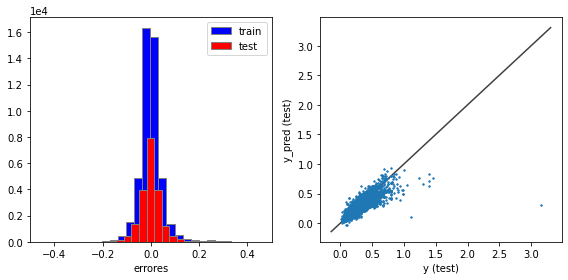

In [ ]:
evaluar_model(reg_ridge, X,y, X_dev_new, X_held_new, y_dev, y_held)
#se observa que el modelo subestima los valores reales, mostrando una baja performance para datos nuevos. 

In [ ]:
params_Ridge = {'alpha': [10,5,4,3,2,1.5,1,0.5,0.01] } #en este caso sólo se buscará el alpha óptimo, los demás parámetros se dejan por default.
Ridge_RS = RandomizedSearchCV(reg_ridge, param_distributions=params_Ridge,cv=5,scoring='neg_root_mean_squared_error',n_iter=100) 

Ridge_RS.fit(X_dev_new,y_dev)
print('The best parameteres after RandomSearchCV', Ridge_RS.best_params_)
print('The best estimator after RandomSearchCV',Ridge_RS.best_estimator_)
print('The best score (RMSE(1e6)) after RandomSearchCV',-Ridge_RS.best_score_)


The best parameteres after RandomSearchCV {'alpha': 1.5}
The best estimator after RandomSearchCV Ridge(alpha=1.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
The best score (RMSE(1e6)) after RandomSearchCV 0.05105270271214424


In [ ]:
params_Ridge = {'alpha': [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5] }#se hace una busqueda más fina
Ridge_GS = GridSearchCV(reg_ridge, param_grid=params_Ridge,cv=5,scoring='neg_root_mean_squared_error') #por default devuelve el R2 en los modelos de regression

Ridge_GS.fit(X_dev_new,y_dev)
print('The best parameteres after GridSearchCV', Ridge_GS.best_params_)
print('The best estimator after GridSearchCV',Ridge_GS.best_estimator_)
print('The best score (RMSE(1e6)) after GridSearchCV',-Ridge_GS.best_score_)


The best parameteres after GridSearchCV {'alpha': 1.7}
The best estimator after GridSearchCV Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
The best score (RMSE(1e6)) after GridSearchCV 0.05105256819300178


Error (RMSE(1e6)) en datos de train: 0.0504
Error (RMSE(1e6)) en datos de test: 0.0529
Error (R2) en datos de train: 0.79497
Error (R2) en datos de test: 0.77278


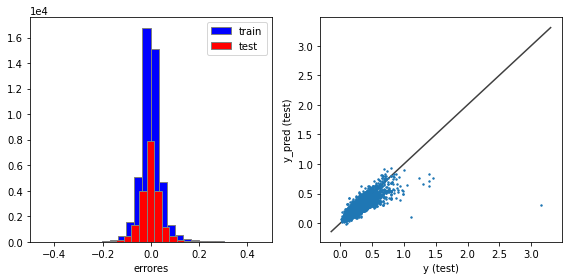

In [ ]:
evaluar_model(Ridge_GS, X,y, X_dev_new, X_held_new, y_dev, y_held)
#se observa que el modelo subestima los valores reales, mostrando una baja performance para datos nuevos. 


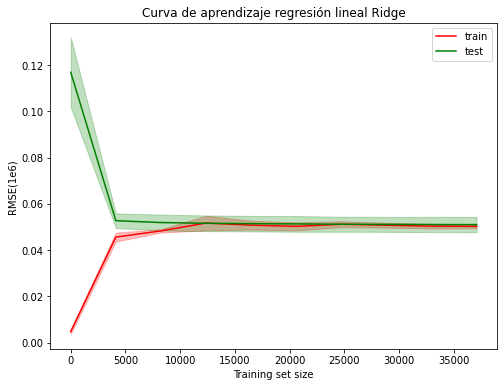

In [ ]:
model=Ridge(alpha= 1.7)
train_sizes, train_scoresr, valid_scoresr = learning_curve(model, X_dev_new, y_dev, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring = 'neg_root_mean_squared_error', cv=5)

train_scores=(-1)*train_scoresr
valid_scores=(-1)*valid_scoresr

fig=plt.figure(figsize = (8,6))
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r',label='train')
plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g',label='test')

plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")
plt.legend()
plt.title('Curva de aprendizaje regresión lineal Ridge')
plt.ylabel('RMSE(1e6)')
plt.xlabel('Training set size')

fig.patch.set_facecolor('xkcd:white')
plt.show()

Haciendo un análisis, el parámetero óptimo de ridge es de 1.7 de alpha. Según lo observado en una selección al azar del parámetro alfa (0.1) y luego haber hecho un análisis más exhaustivo para encontrar el alfa óptimo, se vio que la ganancia en el RMSE tanto en el desarollo como en testeo era marginal y no aportaba mucho la optimización. Esto se observó en los scores de RMSE y R2. Por una parte muestra que el scoring es 1 orden menor al encontrado en los modelos del proyecto 1 optimizados con el preprocesamiento, dando una mejora. 
Sin embargo, analizando la cuerva de aprendizaje, se observa una rápida convergencia de los errores de train y test al aumentar la cantidad de muestras del train, lo cual indica que el modelo para este problema con las condiciones dadas tiende a ser un modelo con alto bias y no funcionaría bien. 


In [ ]:
#REGRESIÓN LINEAL LASSO
reg_lasso = Lasso(alpha= 0.01)
reg_lasso.fit(X_dev_new,y_dev)

print(f'Pendientes: {reg_lasso.coef_}')
print(f'Ordenada: {reg_lasso.intercept_}')

Pendientes: [ 0.01697623  0.          0.         ... -0.          0.
 -0.        ]
Ordenada: 0.16600548678416022


Error (RMSE(1e6)) en datos de train: 0.0725
Error (RMSE(1e6)) en datos de test: 0.0743
Error (R2) en datos de train: 0.57592
Error (R2) en datos de test: 0.55164


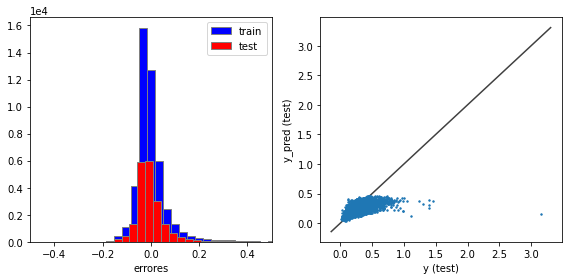

In [ ]:
evaluar_model(reg_lasso, X,y, X_dev_new, X_held_new, y_dev, y_held)
#en este caso los valores ajustados tienden a mejorar en gran medida su predicción, hasta que debe predecir valores altos, donde los subestima.

In [ ]:
params_Lasso= {'alpha': [0.000001,0.000002,0.00003,0.000004,0.000005,0.000006,0.000007,0.000008,0.000009] } #en este caso sólo se buscará el alpha óptimo, los demás parámetros se dejan por default.
Lasso_RS = RandomizedSearchCV(reg_lasso, param_distributions=params_Lasso,cv=5,scoring='neg_root_mean_squared_error',n_iter=100) 

Lasso_RS.fit(X_dev_new,y_dev)
print('The best parameteres after RandomSearchCV', Lasso_RS.best_params_)
print('The best estimator after RandomSearchCV',Lasso_RS.best_estimator_)
print('The best score (RMSE(1e6)) after RandomSearchCV',-Lasso_RS.best_score_)


The best parameteres after RandomSearchCV {'alpha': 1e-06}
The best estimator after RandomSearchCV Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
The best score (RMSE(1e6)) after RandomSearchCV 0.051068859566907945


In [ ]:
params_Lasso = {'alpha': [0.000005,0.000004,0.000003,0.000002,0.000001,0.00009,0.00008,0.00007,0.00006,0.00005]} #se hace una busqueda más fina
Lasso_GS = GridSearchCV(reg_lasso, param_grid=params_Lasso,cv=5,scoring='neg_root_mean_squared_error') #por default devuelve el R2 en los modelos de regression

Lasso_GS.fit(X_dev_new,y_dev)
print('The best parameteres after GridSearchCV', Lasso_GS.best_params_)
print('The best estimator after GridSearchCV',Lasso_GS.best_estimator_)
print('The best score (RMSE(1e6)) after GridSearchCV',-Lasso_GS.best_score_)


The best parameteres after GridSearchCV {'alpha': 1e-06}
The best estimator after GridSearchCV Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
The best score (RMSE(1e6)) after GridSearchCV 0.051068859566907945


Error (RMSE(1e6)) en datos de train: 0.0504
Error (RMSE(1e6)) en datos de test: 0.0529
Error (R2) en datos de train: 0.79508
Error (R2) en datos de test: 0.77288


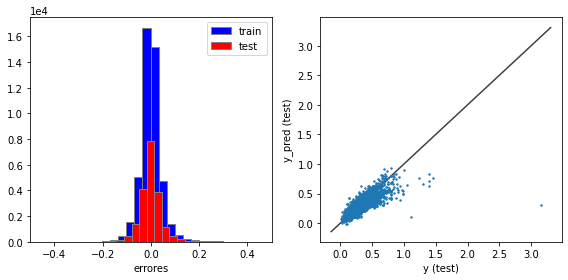

In [ ]:
evaluar_model(Lasso_GS, X,y, X_dev_new, X_held_new, y_dev, y_held)
#En este caso el ajuste de regression de Lasso mejora el problema de subajuste que presentaba Ridge mas se observan también más valores sobreajustados.

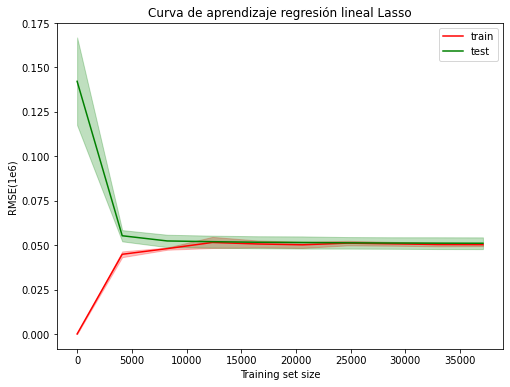

In [ ]:
model=Lasso(alpha = 1e-06)
train_sizes, train_scoresl, valid_scoresl = learning_curve(model, X_dev_new, y_dev, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring = 'neg_root_mean_squared_error', cv=5)

train_scores=(-1)*train_scoresl
valid_scores=(-1)*valid_scoresl

fig=plt.figure(figsize = (8,6))
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r',label='train')
plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g',label='test')

plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")
plt.legend()
plt.title('Curva de aprendizaje regresión lineal Lasso')
plt.ylabel('RMSE(1e6)')
plt.xlabel('Training set size')

fig.patch.set_facecolor('xkcd:white')
plt.show()


Haciendo un análisis, el parámetero óptimo de Lasso es de 1e-06 de alpha. Según lo observado en una selección al azar del parámetro alfa (0.01) y luego haber hecho un análisis más exhaustivo para encontrar el alfa óptimo, se vio que la ganancia en el RMSE tanto en el desarollo como en testeo es considerable (33% en test y 28% en train) a comparación de la de Ridge. También llama la atención la mejora en R2 en donde se tienen aumento de por lo menos 38%)

En cuanto a la cuerva de aprendizaje, se observa una rápida convergencia de los errores de train y test al aumentar la cantidad de muestras del train, lo cual indica que el modelo para este problema con las condiciones dadas tiende a ser un modelo con alto bias y no funcionaría bien. Sin embargo si se compara con lo obtenido en Ridge en las primeras separaciones de las muestras se tiene un gap levemente mayor. Lo cual podría decirse que bajo ciertas condiciones si tuviese que elegir, Lasso sería un mejor modelo que Ridge. Aunque serviría si hay pocos features con importancia considerable (en este caso no es tan buena esta hipotesis).

--------------------------
--------------------------
Otro modelo avanzado que se indagará es el que usa bagging con bootstrap y selección aleatoria de features, es decir un **[Randomforest](https://towardsdatascience.com/machine-learning-basics-random-forest-regression-be3e1e3bb91a)**. 
Es tipo de modelos es del tipo ensamble que corre los modelos de árboles de complejidad alta (tendiendo al overfitting) en paralelo. Para que esten poco correlacionados lo que se realiza es un bootstrap (muetreo con reemplazo) y una selección al azar de los atributos.

También cómo actúa un modelo de boosting y randomforest combinado [***XGBRF***](https://xgboost.readthedocs.io/en/latest/tutorials/rf.html) [(pt.2)](https://machinelearningmastery.com/random-forest-ensembles-with-xgboost/)
En el caso de de un boosting es un modelo de ensamble en Serie, que por lo general se usan modelos de  simple complejidad. en este caso.
Según la documentación, difiere del RandomForest en cómo se aproxima a la función objetivo y no realiza un remuestreo porque estoy en la órbita del boosting.
[XGBRF-Art.interesante](https://datascience.stackexchange.com/questions/23789/why-do-we-need-xgboost-and-random-forest )



In [ ]:
#RANDOM FOREST
X_dev_sc=X_dev_sc.copy()
X_held_sc=X_held_sc.copy()
y_dev=y_dev.copy()
y_held=y_held.copy()

Error (RMSE(1e6)) en datos de train: 0.0159
Error (RMSE(1e6)) en datos de test: 0.0405
Error (R2) en datos de train: 0.9795
Error (R2) en datos de test: 0.86666


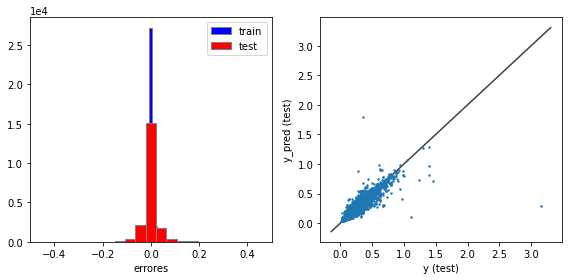

El R2 del OBB es: 0.8292721781180937


In [ ]:
#Comienzo con un randomforest con un numero de estimador a elección para analizar la performance y luego realizo la optimización.
#con max_depth=None por default (es decir parte de supuesto de usar modelos con alta varianza)
model = RandomForestRegressor(n_estimators=10, max_features='auto', n_jobs=-1, oob_score = True, random_state = 42)
model.fit(X_dev_sc,y_dev)
y_train_pred = model.predict(X_dev_sc)
y_test_pred = model.predict(X_held_sc)
evaluar_model(model, X,y, X_dev_sc, X_held_sc, y_dev, y_held)

print('El R2 del OBB es:',model.oob_score_)  #out of bag score. agrega esta predicción para evaluar la performance en el modelo con datos que no tomó en cuenta en el bootstrap. 

In [ ]:
#Optimizo los parámetros del RandomForest (profundidad de arbol y numero de estimadores)
def rfr_model(X, y):# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10,25,50,75,100)
        },
        cv=5, scoring='neg_root_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)# Perform K-Fold CV
   #calcula el score (RMSE) del Randomforest con parámetros óptimos del grid search.
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_root_mean_squared_error')

    return  rfr.fit(X, y),np.mean(-scores),np.std(-scores), gsc.best_params_ ,gsc.best_estimator_,-gsc.best_score_

model,mediaEN,stdEN,BestParam,BestEsti,BestScore= rfr_model(X_dev_sc,y_dev)
print("RMSE(1e6) para el ensamble de RF: %0.4f (+/- %0.4f)" % (mediaEN, stdEN * 2))
print("Los mejores parametros del ensamble de RF: ",BestParam, '\nEl mejor estimador es: ',BestEsti,'\n El cual obturvo el mejor RMSE(1e6): %0.4f' % BestScore)

RMSE(1e6) para el ensamble de RF: 0.0554 (+/- 0.0101)
Los mejores parametros del ensamble de RF:  {'max_depth': 6, 'n_estimators': 75} 
El mejor estimador es:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=75, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 
 El cual obturvo el mejor RMSE(1e6): 0.0554


Error (RMSE(1e6)) en datos de train: 0.0536
Error (RMSE(1e6)) en datos de test: 0.0587
Error (R2) en datos de train: 0.76848
Error (R2) en datos de test: 0.71983


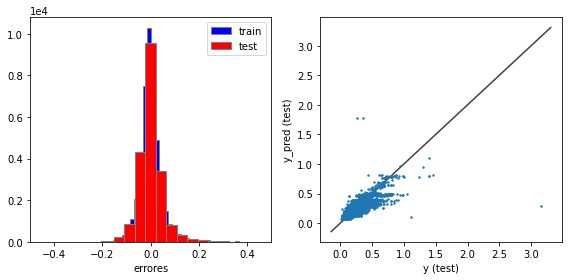

In [ ]:
evaluar_model(model, X,y, X_dev_sc, X_held_sc, y_dev, y_held)

5
10
30
50
60
75
80


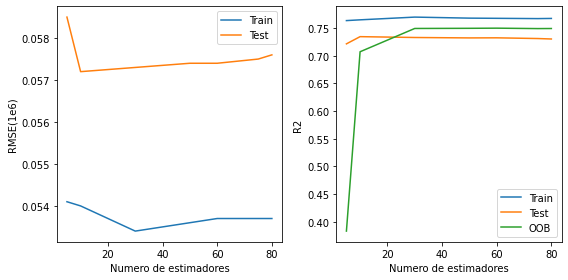

In [ ]:
#Veo la curva de validación para R2 y RMSE en función del número de estimadores del RF. con el hiperparametro de max depht optimo.
train_r2 = []
test_r2 = []
oob_r2 = []
train_RMSE = []
test_RMSE = []


N_estimadores = [5,10,30,50,60,75,80]
for estimadores in N_estimadores:
    print(estimadores)
    model = RandomForestRegressor(n_estimators=estimadores,max_depth= 6,oob_score = True, n_jobs=-1, random_state = 42)
    model.fit(X_dev_sc,y_dev)
    
    y_train_pred = model.predict(X_dev_sc)
    y_test_pred = model.predict(X_held_sc)

    train_r2.append(r2_score(y_dev, y_train_pred))
    test_r2.append(r2_score(y_held, y_test_pred))

    train_RMSE.append(RMSE(y_dev, y_train_pred))
    test_RMSE.append(RMSE(y_held, y_test_pred))
    
    oob_r2.append(model.oob_score_)
    
train_r2 = np.array(train_r2)
test_r2 = np.array(test_r2)
train_RMSE = np.array(train_RMSE)
test_RMSE = np.array(test_RMSE)
oob_r2 = np.array(oob_r2)


fig=plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.plot(N_estimadores, train_RMSE, label = 'Train')
plt.plot(N_estimadores, test_RMSE, label = 'Test')
plt.xlabel('Numero de estimadores')
plt.ylabel('RMSE(1e6)')

plt.legend()

plt.subplot(1,2,2)
plt.plot(N_estimadores, train_r2, label = 'Train')
plt.plot(N_estimadores, test_r2, label = 'Test')
plt.plot(N_estimadores, oob_r2, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('R2')
plt.legend()
plt.tight_layout()

fig.patch.set_facecolor('xkcd:white')
plt.show()
#nos muestra que el mejor desempeño del RandomForest no depende de muchos miembros de ensamble de árboles. Para un estimador de alrededor de 50 tanto el RMSE y R2 muestran una mejora en ambos conjuntos de muestras.


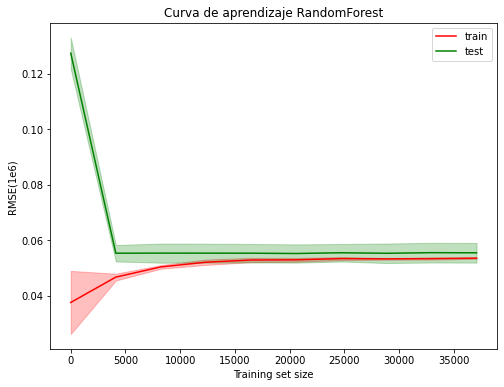

In [ ]:
#indago con una curva de aprendizaje, en función del RMSE cómo es la evolución de la metrica para datos test y train en función del número de muestras
clf = RandomForestRegressor(n_estimators=75,max_depth= 6, n_jobs=-1, oob_score= True, random_state = 42)


train_sizes, train_scores, valid_scores = learning_curve(clf, X_dev_sc, y_dev, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring='neg_root_mean_squared_error', cv=5)
train_scores=(-1)*train_scores
valid_scores=(-1)*valid_scores

fig=plt.figure(figsize = (8,6))
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r',label='train')
plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g',label='test')

plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")
plt.legend()
plt.title('Curva de aprendizaje RandomForest')
plt.ylabel('RMSE(1e6)')
plt.xlabel('Training set size')

fig.patch.set_facecolor('xkcd:white')
plt.show()

Haciendo un análisis del modelo RandomForest se tiene que en primer lugar con la elección de hiperparámetros a elección una reducción del error considerable respecto a lo obtenido con el mismo modelo optimizado. Aún así esto estaría demostrando una tendencia de overfitting en el primer modelo sin optimizar, lo cual no es algo deseable para la generalización.
Se observan mejoras tanto para el RMSE y R2  respecto a los modelos de la parte A.
Además si analizamos la curva de aprendizaje, si bien uno nota una convergencia al aumentar el número de muestras de entrenamiento, la velocidad de convergencia no es parece ser muy rápida en las primeras muestras. Al inicio uno ve que el error de validación es grande evidencia de alta varianza y se reduce (al igual que el gap) agregando pocas muestras lo que lleva a pensar en una disminución en la varianza.
En función de esto, uno espera que con un aumento menor de muestras el modelo tienda a disminuir la varianza sin disminuir tanto su bias.

In [ ]:
#XGBoost-RandomForest

X_dev_sc=X_dev_sc.copy()
X_held_sc=X_held_sc.copy()
y_dev=y_dev.copy()
y_held=y_held.copy()

Error (RMSE(1e6)) en datos de train: 0.0711
Error (RMSE(1e6)) en datos de test: 0.072
Error (R2) en datos de train: 0.59214
Error (R2) en datos de test: 0.57834


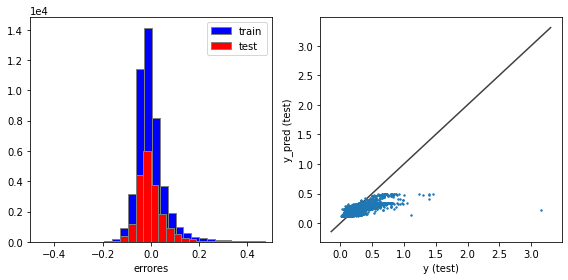

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRFRegressor(base_score=0.5, colsample_bylevel=1,
                                      colsample_bynode=0.2, colsample_bytree=1,
                                      eta=1, gamma=0, learning_rate=1,
                                      max_delta_step=0, max_depth=3,
                                      min_child_weight=1, missing=None,
                                      n_estimators=100, n_jobs=1, nthread=None,
                                      objective='reg:squarederror',
                                      random_state=0, reg_alpha=0, reg_lambda=1,
                                      scale_pos_weight=1, seed=None,
                                      silent=None, subsample=0.9, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 500],
         

In [ ]:
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2,eta =1,objective ='reg:squarederror')
#Observaciones del manual de XGBoost RF (https://machinelearningmastery.com/random-forest-ensembles-with-xgboost/)
#No tiene soporte para deliñar un sampleo con bootstrap para cada árbol de decisión. Esta es una limitación de la biblioteca.
#En cambio, una submuestra del conjunto de datos de entrenamiento, sin reemplazo, se puede especificar mediante el argumento “subsample” como un porcentaje entre 0.0 y 1.0 (100 por ciento de las filas en el conjunto de datos de entrenamiento). Se recomiendan valores de 0,8 o 0,9 para garantizar que el conjunto de datos sea lo suficientemente grande para entrenar un modelo hábil, pero lo suficientemente diferente para introducir cierta diversidad en el conjunto.
#La cantidad de atributos que se usan en cada punto de división cuando se entrena un modelo se puede especificar mediante el argumento "colsample_bynode" y toma un porcentaje de la cantidad de columnas en el conjunto de datos de 0.0 a 1.0 (100 por ciento de las filas de entrada en el conjunto de datos de entrenamiento) .
#colsample_bytree https://medium.com/analytics-vidhya/xgboost-colsample-by-hyperparameters-explained-6c0bac1bdc1
#eta https://xgboost.readthedocs.io/en/latest/tutorials/rf.html
#default parameters https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst

model.fit(X_dev_sc, y_dev)
evaluar_model(model, X,y, X_dev_sc, X_held_sc, y_dev, y_held)
#https://machinelearningmastery.com/random-forest-ensembles-with-xgboost/


#Analizo un parametro optimo
param_grid = {'max_depth': [3, 5, 7, 10],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]}

XGBRF_GRID = GridSearchCV(model, param_grid=param_grid,cv=5,scoring='neg_root_mean_squared_error', n_jobs=-1) 
XGBRF_GRID.fit(X_dev_sc,y_dev)



In [ ]:
print('The best parameteres after GridSearchCV', XGBRF_GRID.best_params_)
print('The best estimator after GridSearchCV',XGBRF_GRID.best_estimator_)
print('The best score (RMSE(1e6)) after GridSearchCV: %0.4f' % -XGBRF_GRID.best_score_)

The best parameteres after GridSearchCV {'colsample_bytree': 0.7, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.7}
The best estimator after GridSearchCV XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.2,
               colsample_bytree=0.7, eta=1, gamma=0, learning_rate=1,
               max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
               n_estimators=100, n_jobs=1, nthread=None,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.7, verbosity=1)
The best score (RMSE(1e6)) after GridSearchCV: 0.0572


Error (RMSE(1e6)) en datos de train: 0.0562
Error (RMSE(1e6)) en datos de test: 0.0582
Error (R2) en datos de train: 0.74544
Error (R2) en datos de test: 0.72463


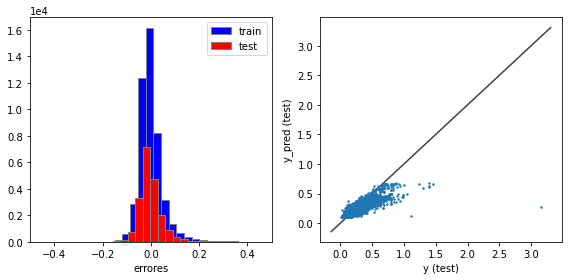

In [ ]:
evaluar_model(XGBRF_GRID, X,y, X_dev_sc, X_held_sc, y_dev, y_held)

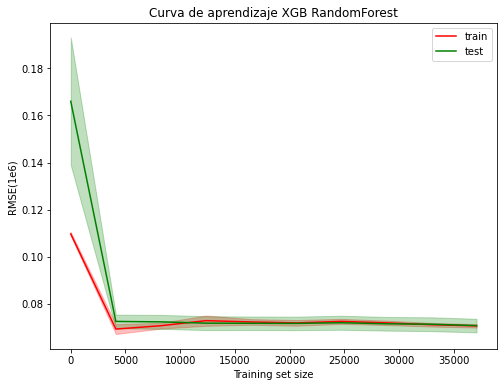

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(model, X_dev_sc, y_dev, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring = 'neg_root_mean_squared_error', cv=5)
train_scores=(-1)*train_scores
valid_scores=(-1)*valid_scores

fig=plt.figure(figsize = (8,6))
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r',label='train')
plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g',label='test')

plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")
plt.legend()
plt.title('Curva de aprendizaje XGB RandomForest')
plt.ylabel('RMSE(1e6)')
plt.xlabel('Training set size')

fig.patch.set_facecolor('xkcd:white')
plt.show()

Por último se decidió apostar a un modelo más complejo que surje de la combinación de XGBoost y RandomForest. En primer lugar, al observar el rendimiento para hiperparametros pareció no tener una buena performance tanto en el set de entrenamiento y prueba. Es por esto que se prosiguió a realizar una optimización y se vio una mejora, mas la ganancia a simple vista no muestra considerable a como se observó en otros modelos.
Con este análisis se suma el de la curva de aprendizaje. Con solo mirar los resultados se demuestra que el modelo presenta un alto bias, dando a entender que el modelo no logra capturar la forma de los datos (ambos set de datos muestran comportamientos parecidos) y una convergencia muy rápida es evidente en la curva.

**C.** Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

Luego de la evaluación de los modelos avanzados se llega a la conclusión de que los modelos Ridge y RandomForest han demostrado un mejor desempeño para este problema. Sin embargo, gracias a la optimización de sus hiperparámetros e indagar la curva de aprendizaje para el tamaño de las muestras se ha convenido que el modelo RandomForest es el que elegiría como mejor modelo para este problema.
Miremos acontinuación cómo fue la performance de las métricas de evaluación:

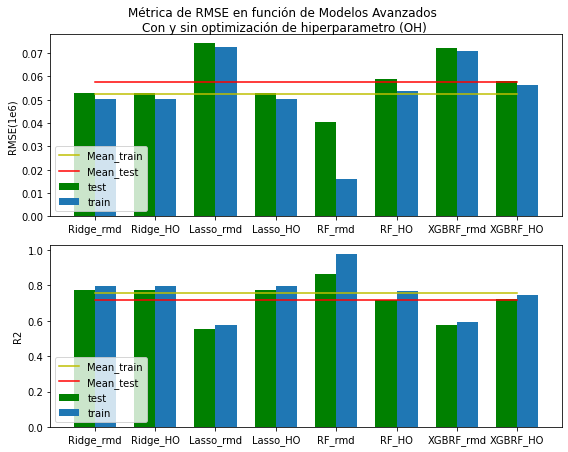

In [ ]:
rmse_train = [0.0503,0.0504,0.0725,0.0504,0.0159,0.0536,0.0711,0.0562]
rmse_test = [0.0529, 0.0529,0.0743,0.0529,0.0405,0.0587,0.072,0.0582]
mean_rmse_train=np.mean(rmse_train)
mean_rmse_test=np.mean(rmse_test)


r2_train=[0.79541, 0.79497,0.57592,0.79508,0.9795,0.76848,0.59214,0.74544]
r2_test =[0.77245, 0.77278,0.55164, 0.77288,0.8666,0.71983,0.57834,0.72463]
mean_r2_train=np.mean(r2_train)
mean_r2_test=np.mean(r2_test)



#Grafico la metrica en funcion del modelo y los datos train/test
labels=['Ridge_rmd','Ridge_HO','Lasso_rmd','Lasso_HO','RF_rmd','RF_HO','XGBRF_rmd','XGBRF_HO']


x = np.arange(len(labels))
width = 0.35  # the width of the bars
fig, axs = plt.subplots(2,figsize=(8,6))
fig.patch.set_facecolor('xkcd:white')
rects1 = axs[0].bar(x - width/2, rmse_test, width, label='test',color='green')
rects2 = axs[0].bar(x + width/2, rmse_train, width, label='train')
# Add some text for labels, title and custom x-axis tick labels, etc.
axs[0].set_ylabel('RMSE(1e6)')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
autolabel(rects1)
autolabel(rects2)
axs[0].plot(x,np.full((len(x), 1), mean_rmse_train),'y',label='Mean_train')
axs[0].plot(x, np.full((len(x), 1), mean_rmse_test),color='red',label='Mean_test')
plt.rcParams['figure.facecolor'] = 'white'
axs[0].legend()


rects1 = axs[1].bar(x - width/2, r2_test, width, label='test',color='green')
rects2 = axs[1].bar(x + width/2, r2_train, width, label='train')
# Add some text for labels, title and custom x-axis tick labels, etc.
axs[1].set_ylabel('R2')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)

autolabel(rects1)
autolabel(rects2)

axs[1].plot(x, np.full((len(x), 1), mean_r2_train),color='y',label='Mean_train')
axs[1].plot(x, np.full((len(x), 1), mean_r2_test),color='red',label='Mean_test')
axs[1].legend()

st=plt.suptitle('Métrica de RMSE en función de Modelos Avanzados \nCon y sin optimización de hiperparametro (OH)\n')
# shift subplots down:
st.set_y(1.04)
fig.subplots_adjust(top=1)

fig.patch.set_facecolor('xkcd:white')
fig.tight_layout()
plt.show()

#la media de RMSE y R2 para ambos sets son muy parecidas
#OBS: esta celda si bien lo hice a mano podría haber hecho una función para ir haciendo un

A simple vista podemos tener una idea del comportamiento de los modelos estudiados previamente. En términos generales considero que para tener una desición sobre el mejor modelo, que no tienda ni a overfitting ni underfitting, tomar como referencia la media de las métricas obtenidas para tener una base de comparación.
En estos términos la elección del RF con Hiperparámetros optimizados es el que mantiene una paridad en desempeño tanto en train y test respecto la media de los desempeños de los modelos. Si bien esto parecería raro ya que hay otros modelos que mejoran con los datos test, la elección se basó también con el estudio de las curvas de aprendizaje. En este caso el RF permitía una mejora (aunque leve) para bajar la varianza, lo cual permite que el modelo no tienda al overfitting al agregar nuevas muestras tan rapidamente.



Los modelos en general tienden a subvalorar el precio de las propiedades a medida que el precio es mayor:

1)Es posible se debe a que los valores outliers que eliminamos en realidad son valores atipicos naturales, y no valores atipicos artificiales (debido a un error); y por lo tanto no cuenta con el dato para poder predecir los precios de esas propiedades. Tal vez deberiamos considerar tratarlos de forma diferente, ya sea dejandolos en el dataset con un umbral mayor o por separados creando modelos especiales.

2)Probablemente se deba a datos sobre las propiedades en si que desconocemos o no esta en el dataset, y que podrian ser importantes a la hora de evaluar el Precio de cada propiedad (por ej si son propiedades con algun valor historico, o si los parquizados son relevantes, etc)

3)Puede que la prediccion de los precios se ven más influenciado por el tipo de Propiedad en determinar el precio, ya que es un dataset en el que el predominio de propiedades son los departamentos, y cuya distribucion en los barrios tambien es totalmente diferente, al de casas por ejemplo. Tal vez habria que tratar cada propiedad por separado.

A la vista de los resultados obtenidos el modelo elegido RandomForest con la optimizacion de los hiperparametros es considerado el mejor modelo.

--------------------
--------------------

#PARTE C. Interpretación de modelos
De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:


    -¿Qué variables fueron relevantes para el modelo para hacer una predicción?¿Cuáles no?
    -Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. 
    -Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué?
    -Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
    -¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?


**Checklist**
-Debes responder al menos una pregunta. 

*Importante*

    1.Estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
    2.Es muy importante que analices los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?
    3.Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías? Ten en cuenta siempre terminar con una discusión sobre lo realizado y conclusiones obtenidas

1.¿Qué variables fueron relevantes para el modelo para hacer una predicción?¿Cuáles no?
¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

Elijo el modelo de la parte B finalista **RANDOMFORES con HO** 


            0                  atributos
5   44.087048              surface_total
6   23.974014            surface_covered
0   16.038068                        lat
44  11.065592      Barrio__Puerto Madero
4    1.743717                  bathrooms
..        ...                        ...
32   0.000000          Barrio__Monserrat
34   0.000000              Barrio__Nuñez
35   0.000000               Barrio__Once
37   0.000000  Barrio__Parque Avellaneda
66   0.000000   Barrio__Villa del Parque

[67 rows x 2 columns]


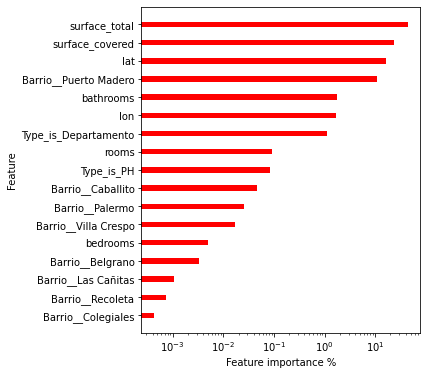

In [ ]:
#Analizo la importancia de los atributos
rfr = RandomForestRegressor(max_depth=6, n_estimators=75, random_state=False, verbose=False)# Perform K-Fold CV
rfr.fit(X_dev_sc, y_dev)
df_c=pd.DataFrame(rfr.feature_importances_*100)
df_c['atributos']=X_dev.columns.values
print(df_c.sort_values(by=[0],ascending=False))

df_c = df_c.sort_values(by=[0])
df_c =df_c[df_c[0]>0]
fig=plt.figure(figsize=(5,6))
plt.barh(df_c.atributos,df_c[0],height=0.3,align='center', color='red')
plt.xlabel('Feature importance %')
plt.ylabel('Feature')
plt.xscale('log')
fig.patch.set_facecolor('xkcd:white')
plt.show()

Si observamos la importancia de los atributos que devuelve RF optimizado, vemos que superficie cubierta domina los demás, destacándose claramente como el predictor más importante del precio de las propiedades seguido de latitud y  superficie total. Si bien se adicionaron aquellos campos que eran categoricos, las principales que se usaron en el primer proyecto siguien estando presentes.

De las variables categóricas se observa que hay barrios que son muchos menos relevantes que otros (estos sitios con mayor cantidad de propiedades (ver resumen inicial, figura de top 10 de cantidad de propiedades por barrio). Los que menos propiedades en barrios tenían fueron menos relevantes.

Esto es parte era esperable que sucediera, mas no se esperaba la magnitud de algunos features nuevos.




* Observar qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué?
Analizo un árbol al azar

En este caso la importancia del árbol individual tiene menores atributos de importancia.  Se diferencia en que todos los arboles tienen una selección al azar de los atributos (además del bootstrap), con esto la importancia de los atributos para cada arbol se modifica.


            0                  atributos
5   44.087048              surface_total
6   23.974014            surface_covered
0   16.038068                        lat
44  11.065592      Barrio__Puerto Madero
4    1.743717                  bathrooms
..        ...                        ...
32   0.000000          Barrio__Monserrat
34   0.000000              Barrio__Nuñez
35   0.000000               Barrio__Once
37   0.000000  Barrio__Parque Avellaneda
66   0.000000   Barrio__Villa del Parque

[67 rows x 2 columns]


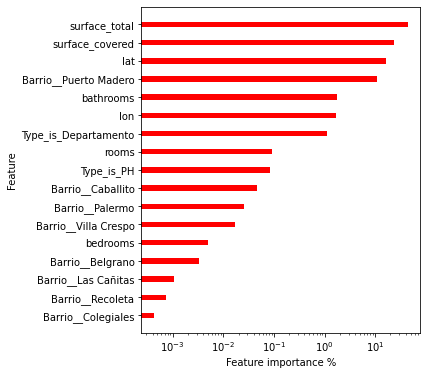

In [ ]:
arbol = rfr.estimators_[33] #veo cada arbol del ensamble
arbol.get_params()
df_c=pd.DataFrame(arbol.feature_importances_*100)
df_c['atributos']=X_dev.columns.values
print(df_c.sort_values(by=[0],ascending=False))

df_c=df_c.sort_values(by=[0],ascending=True)
df_c =df_c[df_c[0]>0]
fig=plt.figure(figsize=(5,6))
plt.barh(df_c.atributos,df_c[0],height=0.3,align='center', color='red')
plt.xlabel('Feature importance %')
plt.ylabel('Feature')
plt.xscale('log')
fig.patch.set_facecolor('xkcd:white')
plt.show()

2.Es muy importante que analices los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?

En cuanto al error obtenido: la distribucion tener una leve asimetría positiva donde el modelo tendría más a subestimar el valor del target. 
Respecto a la dispersión de los errores podemos ver que a medidad que aumentan los valores del target el modelo no llega a obtener valores deseados, sino que son menores.


Error (RMSE(1e6)) en datos de train: 0.0536
Error (RMSE(1e6)) en datos de test: 0.0587
Error (R2) en datos de train: 0.76848
Error (R2) en datos de test: 0.71983


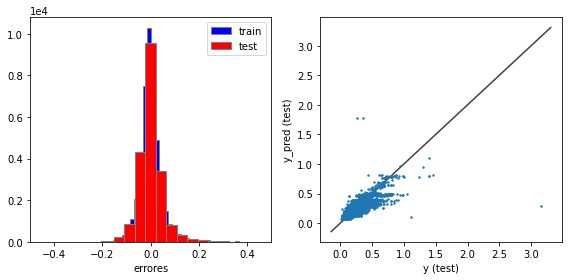

In [ ]:
evaluar_model(rfr, X,y, X_dev_sc, X_held_sc, y_dev, y_held)

3.Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías? Ten en cuenta siempre terminar con una discusión sobre lo realizado y conclusiones obtenidas

Si bien se obtuvieron resultados que mejoraron la performance de los modelos del primer proyecto, también hay que tener en cuenta que los preprocesamientos pueden haberse realizado de otra forma (como las imputaciones de valores faltantes primero y luego eliminar outliers) o reagrupar variables mediante un método de Componentes principales basandonos en aquellos que aportan la mayor varianza, por ejemplo serviría para reducir el número de dimensiones de los barrios (como ya se encuentran encodeados con 0 y 1 no haría falta estandarizarlos). En este caso no se realizó ningún análisis de PCA para ver el aporte general de los datos categóricos.
Otra posible idea mejoras en el preprocesamiento sería la de poder imputar los valores faltantes de latitud y longuitud en el caso de que la agencia inmobiliaria posea como dato extra la dirección en la que se ubica la propiedad, apartir de esto uno podría geocodificar estos datos para obtener el posicionamiento en lat-lon.

Otra posible mejora es realizar un ensamble de modelos, es decir en base a los resultados generales obtenidos se podría probar un ensamble stacked que los combine y probablemente poder así obtener un modelo más robusto.

También buscaría un modelo que pueda predecir en forma precisa los valores de las propiedades mas caras que es donde los modelo más tiene complicaciones.




---



---



---



# **DESAFÍO OPCIONAL**
En este caso sólo hice un pequeño análisis con kmeans de forma espacial.

Aplica una técnica de Clustering sobre el dataset.
¿qué barrios se parecen más entre sí?
Los barrios pequeños se parecen más entre sí y los cluster suelen confundir las frontersas entre ellos. mientras que los barrios grandes suelen partirse en clusters menores.

###Analisis extra 1

In [ ]:
#hacerlo una vez visto PSA
Data_custer=Data_filtrado.copy()

Data_custer.head(2)


,start_date,end_date,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
0,2019-10-17,2019-12-23,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
1,2019-10-17,2019-11-21,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH


In [ ]:
#uso librerías geoespaciales, en caso d eno tenerlas se recomienda correr esta celda.
!pip install pillow
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp36-cp36m-linux_x86_64.whl size=121757242 sha256=1daf1c474caa2fc5a67fccb38202fce7c9cb7ae74fa4327d39f6c39334f0cecb
  Stored in directory: /tmp/pip-ephem-wheel-cache-xr9msz3b/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

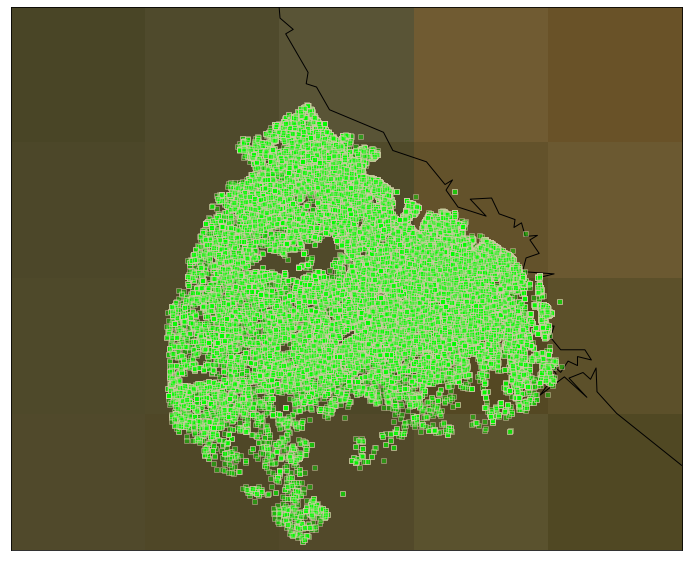

In [ ]:
llon=-58.6
ulon=-58.3
llat=-34.7
ulat=-34.5

# selecting the boundaries of the map from lattitude and longitude 

Data_custer = Data_custer[(Data_custer['lon'] > llon) & (Data_custer['lon'] < ulon) & 
                        (Data_custer['lat'] > llat) &(Data_custer['lat'] < ulat)]


my_map = Basemap(projection='merc',
            resolution = 'h', area_thresh = 10.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
my_map.bluemarble()
# To collect data based on stations        

xs,ys = my_map(np.asarray(Data_custer['lon']), np.asarray(Data_custer['lat']))
Data_custer['xm']= xs.tolist()
Data_custer['ym'] =ys.tolist()

#Visualization1
for index,row in Data_custer.iterrows():
   x,y = my_map(row.lon, row.lat)
   my_map.plot(row.xm, row.ym,markerfacecolor ='lime',markeredgecolor='pink', marker='s', markersize= 5, alpha = 0.4)
plt.show()

In [ ]:
#Data_custer['property_type'] = Data_custer['property_type'].map({'Departamento':2,'PH':1,'Casa':2})
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Data_custer['BarriosNro'] = labelencoder.fit_transform(Data_custer['l3'])

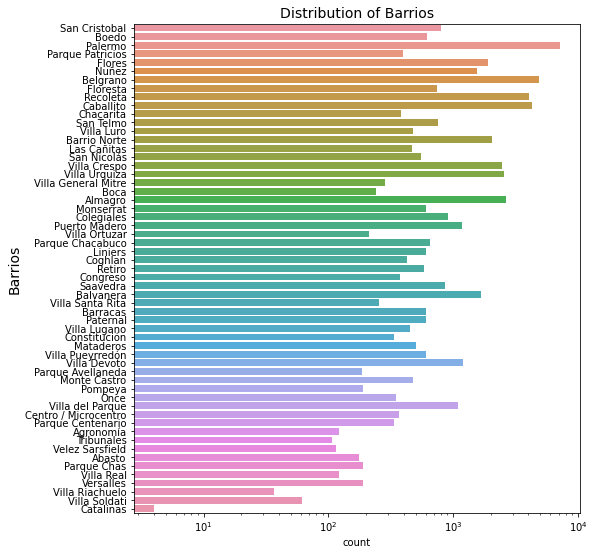

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,9))
sns.countplot(y=Data_custer['l3'])
plt.ylabel('Barrios', fontsize=14)
plt.title("Distribution of Barrios", fontsize=14)
plt.xscale('log')
plt.show()

[[23912.55779031 12722.51615608]
 [20892.38269037 10266.76247073]
 [18152.10732799 16043.46382666]
 ...
 [19215.18592359 15494.98634884]
 [18192.72681557 15659.85655283]
 [20276.93364998 15678.61816125]]


<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

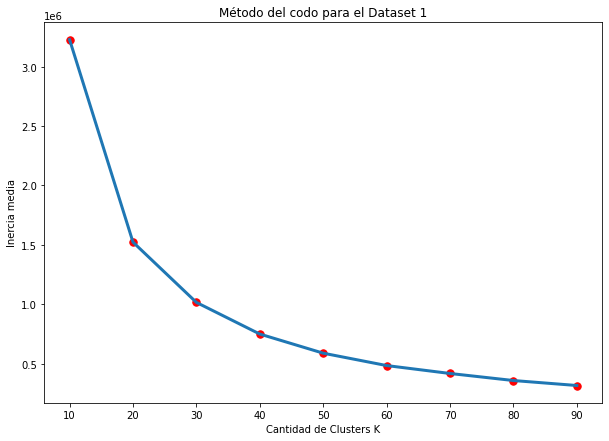

In [ ]:
from sklearn.cluster import KMeans
# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
K = np.arange(10,100,10)

X= np.column_stack((xs,ys))
print(X)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X.shape[0]) # distancia total dividido el tamanio (la cantidad de muestras/instancias)
    Sum_of_squared_distances.append(distancia_media)

    plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 1')

plt.show()


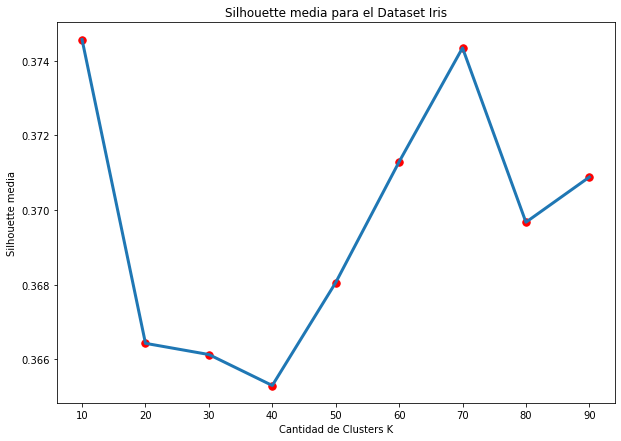

In [ ]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in range(10,100,10):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    # Tomamos las etiquetas
    etiquetas = km.labels_
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(X, etiquetas)
    lista_sil.append(valor_medio_sil)

plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el Dataset Iris')

plt.show()

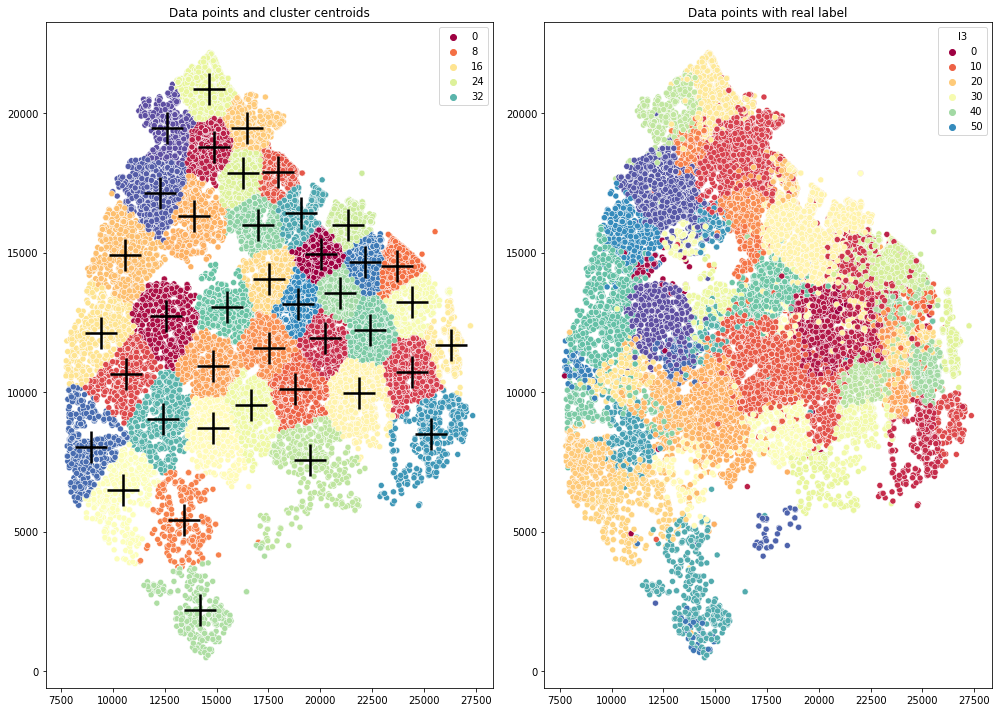

In [ ]:
kmeans_1 = KMeans(n_clusters=50, random_state=0)
kmeans_1.fit(X)
etiquetas_1 = kmeans_1.labels_
centros_1 = kmeans_1.cluster_centers_
plt.subplot(121)
sns.scatterplot(X[:, 0], X[:, -1], hue = etiquetas_1,palette="Spectral")
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.subplot(122)
sns.scatterplot(X[:, 0], X[:, -1], hue=Data_custer['l3'],palette="Spectral")
plt.title('Data points with real label')
plt.tight_layout()
plt.show()

Es llamativo que el silhouette muestra valores bajos de la metrica de la media de S entre K 40 y 50, que es el número más cercano a la cantidad de barrios en Capital federal (48).
Hay algunas cosas que es entendible que los clusters no sean en algunas zonas tan parecidos, esto se debe a que hay barrios con formas convexas y el centroide pueden quedar fuera de la nube de puntos. Es por eso que barrios como flores no estan bien clusterisados, pero villa devoto son muy parecidos. [Imagen de barrios](https://es.wikipedia.org/wiki/Barrios_de_la_ciudad_de_Buenos_Aires#/media/Archivo:Mapa-CABA-Barrios-Nombres.svg)

###Análisis 2 extra

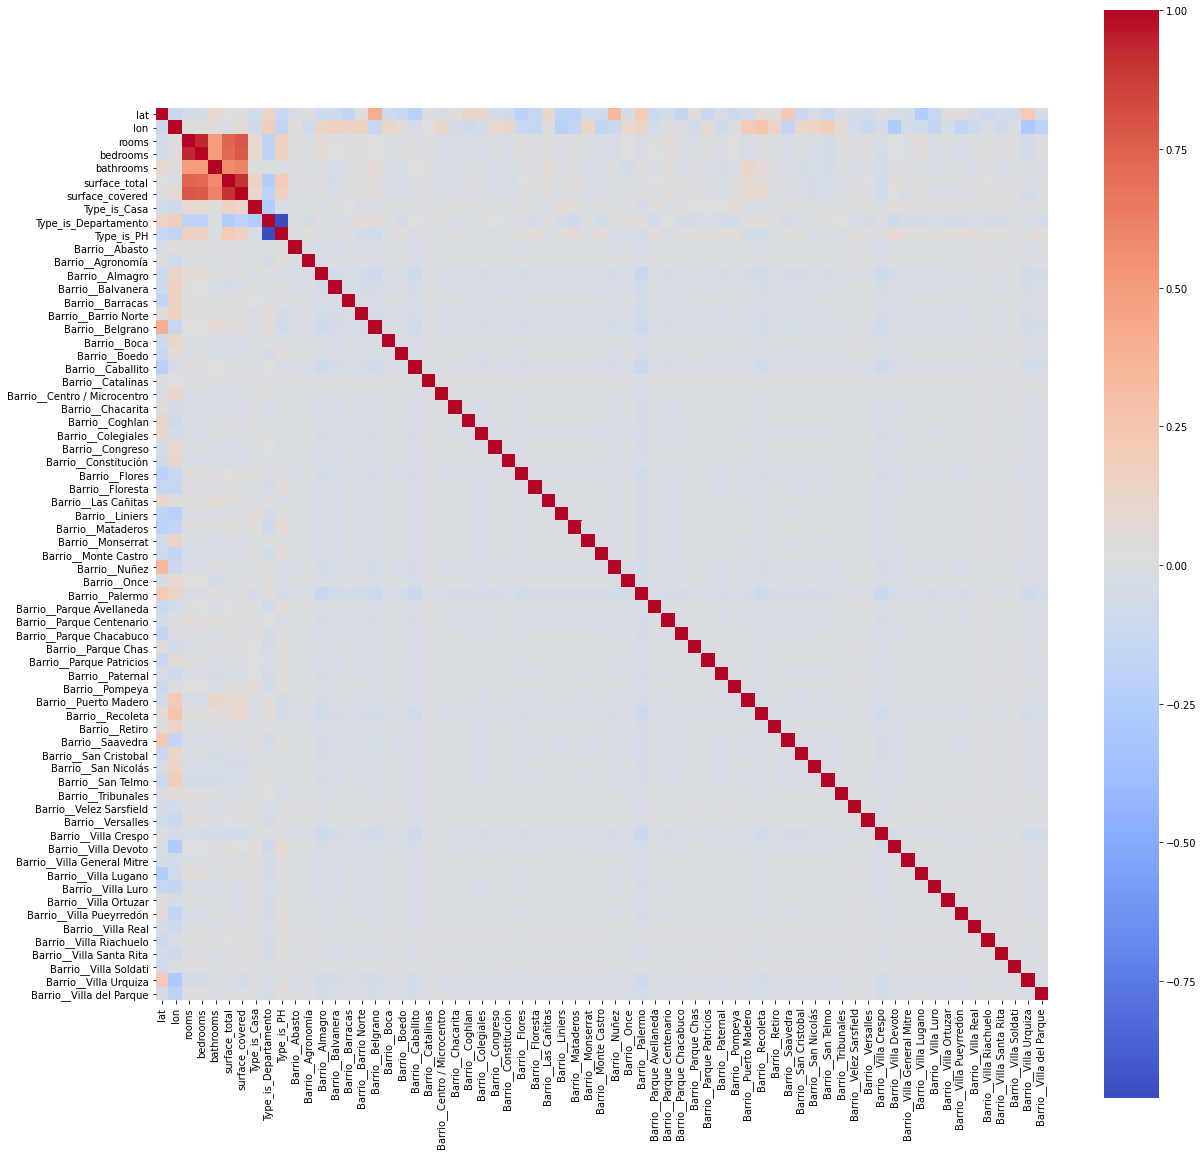

In [ ]:
#Otra forma de analisis de clustering es  apartir de combinación de features con mayor varianza.
#Realizo un análisis con PCA
#Para ello analizo el mapa de correlación para todos los atributos utilizados en el proyecto. Para observar si existen correlaciones importantes.
data_pca=Model_data.copy()
X=data_pca.drop(["price",'l3','property_type'],axis=1)

corr = X.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True,
           xticklabels= X.columns, 
           yticklabels= X.columns,
           cmap= 'coolwarm')

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
x = X.values
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)#indico el numero de compomentes principales que queiro
X2 = pca.fit_transform(x)
X3=pd.DataFrame(X2,columns=['Feature1','Feature2'])
y3=data_pca['property_type'] #me quedo con la etiqueta para poder comparar 


In [ ]:
X3

,Feature1,Feature2
0,0.512787,2.943277
1,-0.662192,2.431727
2,-0.011091,2.353779
3,-0.420292,2.981744
4,0.033713,2.883617
...,...,...
66225,2.580099,-1.475047
66226,3.426708,-1.761117
66227,2.657613,-1.517347
66228,5.552487,1.010249


In [ ]:
pca.explained_variance_

array([4.04013781, 2.39066157])

In [ ]:
pca.explained_variance_ratio_*100

array([6.02996539, 3.56809773])

In [ ]:
from sklearn.cluster import KMeans
#se define y entrena el modelo
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X3)
#miramos las etiquetas y centros de los clusters
etiquetas = kmeans.labels_
centros = kmeans.cluster_centers_

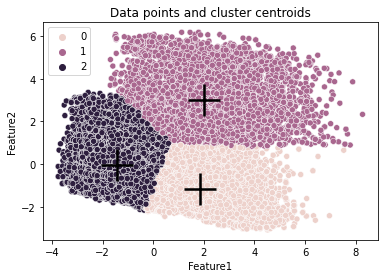

In [ ]:
#Los datos clusterizados
sns.scatterplot(X3.Feature1, X3.Feature2, hue = etiquetas)
sns.scatterplot(centros[:, 0], centros[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

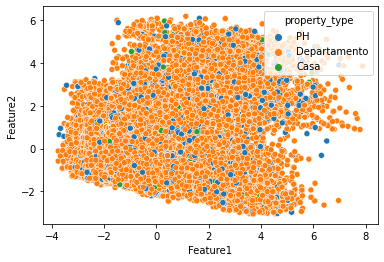

In [ ]:
#Con las etiquetas originales
sns.scatterplot(x='Feature1', y='Feature2', hue=y3, data= X3)
plt.show()


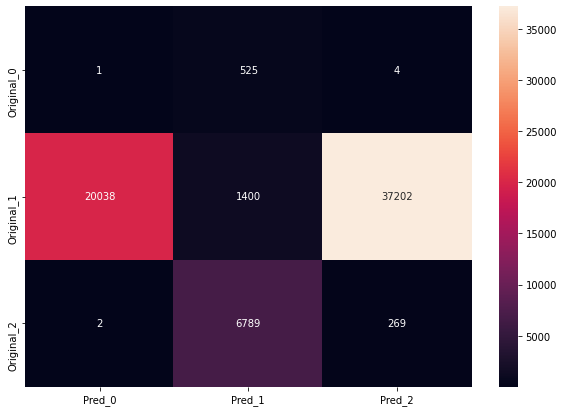

In [ ]:
#Para ver el acuerdo que hubo entre los clusters determinados por el algoritmos de clustering y los generados originalmente, podemos usar una matriz de confusión.

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
y3 = labelencoder.fit_transform(y3)

#observo la matriz de confusión para ver cómo fue el rendimiento de lo observado respecto de lo predicho.
cm = confusion_matrix(y3, etiquetas)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")

en clusterin hacer pca, instancias que se ogrupan por tipo de Se observa que al tratar encontrar patrones con los features más importantes obtenidos del PCA no se llega a una separación del tipo de propiedad adecuada en la clusterización.
Esto se observa para un dataset filtrado previamente, lo cual en caso de no realizarse o de generar otras metodologías de preprocesamiento podrían encontrarse patrones más adecuados a la separación del tipo de propiedad.

Como se observa en la matriz de confusión existen dos predictores que interpretan más una instancia original y no se obtinee una separación adecuada.